In [10]:
geoCoordCache
from collections import defaultdict

In [26]:
[get_lat_long(apt) for apt in apt_list]

[['139.82608000000002:35.71707'],
 ['139.76917:35.738440000000004'],
 ['139.79731:35.74475'],
 ['139.72165:35.651109999999996'],
 ['139.85166999999998:35.7385'],
 ['139.74147:35.70263'],
 ['139.69987:35.62198'],
 ['139.70151:35.72415'],
 ['139.70343:35.7241'],
 ['139.85023999999999:35.736259999999994'],
 ['139.704:35.698570000000004'],
 ['139.70432:35.698479999999996'],
 ['139.70433:35.69847'],
 ['139.70433:35.698479999999996'],
 ['139.61021000000002:35.65918'],
 ['139.60846999999998:35.65933'],
 ['139.70727:35.6944'],
 ['139.72313:35.617940000000004'],
 ['139.72722:35.658190000000005'],
 ['139.65974:35.67273'],
 ['139.65974:35.67273'],
 ['139.68367:35.67191'],
 ['139.70433:35.69847'],
 ['139.70433:35.698479999999996'],
 ['139.70435:35.698479999999996'],
 ['139.70433:35.698479999999996'],
 ['139.37936000000002:35.705690000000004'],
 ['139.76445:35.72035'],
 ['139.79121:35.79273'],
 ['139.78049:35.72208'],
 ['139.79205:35.79137'],
 ['139.79263:35.79302'],
 ['139.69196000000002:35.72097'

In [3]:
h3_cells

h3.h3_to_geo('873776054ffffff')

(40.17986113938729, -144.28698541105948)

In [2]:
import requests

geoCoordCache = {}

In [15]:
import concurrent.futures
import time 

_ = 'find 3-5 houses for 10 people and each house is close to the residents favorite preferences (two people like yoga, two people like kick boxing,  two people like rock climbing,  all of them like wind-surfing and they all dislike bars but half like libraries and the other half prefer bookstores and some prefer high rates of appreciation while others prefer to rent and some like disco and the others prefer country) - '
import h3
from compiled_functions import getAirbnbs
import re
documentContext = {}
#poi to OSM for now 
#how much would it cost to -> clone database of GM vs api requests 
#neighborhood characteristics -> family friendly, hipsterish, proximity to water, land usage, 
#80% of relevant data is the sorrounding neighborhood + commute to friends + 
#make it possible to paste "also please be 30 min drive from <address>""
# GPT_query = 'convert this sentence to a json of preferences'
preferences = {
'Yoga': [0.5, 1.5, 0.2, 1.0, 0.8, 0.3],  
'Kickboxing': [0.3, 0.7, 1.5, 2.0, 1.2, 1.8],
'RockClimbing': [1.2, 0.8, 0.4, 1.5, 0.6, 2.0],
'WindSurfing': [0.4, 0.3, 0.2, 0.8, 0.7, 1.0],
'Bars': [2.5, 3.0, 1.5, 2.2, 3.5, 3.8],
'Libraries': [0.5, 1.0, 1.2, 0.8, 1.5, 1.0],
'Bookstores': [1.0, 0.5, 0.7, 1.2, 0.4, 0.6],
'AppreciationRate': [5, 7, 4, 6, 8, 5],  
'Rent': [1000, 1100, 1050, 1150, 1200, 1250],
'Disco': [1.5, 2.0, 0.8, 0.6, 1.2, 1.0],
'Country': [0.8, 0.5, 1.0, 1.2, 0.9, 0.6]
}
preferences = {
'Yoga': [0.5, 1.5, 0.2, 1.0, 0.8, 0.3],  
'Kickboxing': [0.3, 0.7, 1.5, 2.0, 1.2, 1.8],
'RockClimbing': [1.2, 0.8, 0.4, 1.5, 0.6, 2.0],
'WindSurfing': [0.4, 0.3, 0.2, 0.8, 0.7, 1.0],
'Bars': [2.5, 3.0, 1.5, 2.2, 3.5, 3.8],
'Libraries': [0.5, 1.0, 1.2, 0.8, 1.5, 1.0],
'Bookstores': [1.0, 0.5, 0.7, 1.2, 0.4, 0.6],
'AppreciationRate': [5, 7, 4, 6, 8, 5],  
'Rent': [1000, 1100, 1050, 1150, 1200, 1250],
'Disco': [1.5, 2.0, 0.8, 0.6, 1.2, 1.0],
'Country': [0.8, 0.5, 1.0, 1.2, 0.9, 0.6]
}
preference_poi = ['restaurant', 'library', 'atm', 'vending_machine', 'bench', 'parking_space', 'bank', 'clinic', 'place_of_worship', 'research_institute']
preferences = {}
import random
for poi in preference_poi:
    preferences[poi] = [random.random() for _ in range(10)]
#10 people - 10 houses 
#10 houses 
#leave notebook on other url so anyone can add to it -> has to approved 
#main use case -> type a document or a bunch of random shit -> computer generates a workflow, app, tool or solves ur problem as long as its information only or remote code exeuctionable which seems to be 100% of problems from alan kay's thing sometimes between now and 2027
people_names = 'fred bob sally panda velma gis mercator machester last day'.split(' ')
import json
def get_room_id(url):
    match = re.search(r'rooms/(\d+)', url)
    if match: return match.group(1)
    else: return None

def get_lat_long(apt):
    _ = get_room_id(apt)
    val = json.load(open(f'data/airbnb/geocoordinates/{_}_geocoordinates.json'))
    val = val[0].split(':')
    val = [float(val[1]), float(val[0])]
    return val
#h3_coords = {}
h3_cells = {}
#hex_id => {poi_key: 123 }
import copy
def filter_by_poi(_, documentContext, sentence):
    poi = sentence.strip().split(' ')[2]
    if 'sliders' not in documentContext: documentContext['sliders'] = {}
    if poi not in documentContext['sliders']: documentContext['sliders'][poi] = .5
    if (_ == 'hello-world'): return {'component': '<slider>', 'data': _, 'label': poi}
    if (type(_) is not list): _ = _['data']
    return {'component': '<slider>', 'data': _, 'label': poi}

#def attempt_at_building_communities(_, documentContext):
#num_houses = re.find(r'find (\d)-(\d) houses')
num_houses = float(re.findall(r'find (\d-\d) houses', _)[0].split('-')[1])
city_name = 'Tokyo--Japan'
apt_list = json.load(open(f'data/airbnb/apt/{city_name}.json'))[:1000]
all_houses = apt_list
not_a_schema = {'component': '<slider>', 'data': all_houses}
coefficents = ['yoga', 'kick-boxing', 'rock_climbing', 'wind-surfing', 'bars', 'country', 'disco', 'bookstores']
coefficents = ['restaurant', 'library', 'atm', 'vending_machine', 'bench', 'parking_space', 'bank', 'clinic', 'place_of_worship', 'research_institute']

print('1')
for coeff in coefficents:
    filter_by_poi(not_a_schema, documentContext, f'i like ${coeff}')
#list of 10,000 airbnbs
#for each one, dont get the isochrone -> rank each one 
#h3 cell every square mile in tokyo with each POI 
#10,000 -> sorted in 10 different ways -> no extra used memory.
#10,000 * 10,000
h3_cells = {}
for apt in all_houses:
    coords = get_lat_long(apt)
    hex_id = h3.geo_to_h3(float(coords[0]), float(coords[1]), resolution=7)
    #if hex_id not in h3_cells: 
    h3_cells[hex_id] = {}
print('2')

1
2


In [34]:
h3_cells

{'872f5a323ffffff': {'restaurant': 18,
  'library': 18,
  'atm': 18,
  'vending_machine': 18,
  'bench': 18,
  'parking_space': 18,
  'bank': 18,
  'clinic': 18,
  'place_of_worship': 18,
  'research_institute': 18},
 '872f5a32affffff': {'restaurant': 127,
  'library': 127,
  'atm': 127,
  'vending_machine': 127,
  'bench': 127,
  'parking_space': 127,
  'bank': 127,
  'clinic': 127,
  'place_of_worship': 127,
  'research_institute': 127},
 '872f5a305ffffff': {'restaurant': 127,
  'library': 127,
  'atm': 127,
  'vending_machine': 127,
  'bench': 127,
  'parking_space': 127,
  'bank': 127,
  'clinic': 127,
  'place_of_worship': 127,
  'research_institute': 127},
 '872f5aaddffffff': {'restaurant': 458,
  'library': 458,
  'atm': 458,
  'vending_machine': 458,
  'bench': 458,
  'parking_space': 458,
  'bank': 458,
  'clinic': 458,
  'place_of_worship': 458,
  'research_institute': 458},
 '872f5a331ffffff': {'restaurant': 56,
  'library': 56,
  'atm': 56,
  'vending_machine': 56,
  'bench

In [37]:
from collections import defaultdict
def fetch_coffee_shops(longitude, latitude, amenities=''):
    #if round(longitude, 2) in geoCoordCache: 
        #print('WE GOT THE CACHE', len(geoCoordCache[round(longitude, 1)]))
        #return geoCoordCache[round(longitude, 2)]
    # if (os.path.exists(f'data/airbnb/poi/{longitude}_{latitude}_places.json')):
    #     return json.load(open(f'data/airbnb/poi/{longitude}_{latitude}_places.json', 'r'))
   
    places = []
    query = f"""
    [out:json][timeout:25];
    (
        node["amenity"="{amenities}"]({latitude - 0.01},{longitude - 0.01},{latitude + 0.01},{longitude + 0.01});
    );
    out body;
    """ 
    overpass_url = "https://overpass-api.de/api/interpreter"
    response = requests.get(overpass_url, params={'data': query})

    if response.status_code == 200:
        data = response.json()
 
        coffee_shops = data['elements']
        places += coffee_shops
    #print(len(places), longitude, latitude)

    if len(places) > 0:
        #print(places)
        geoCoordCache[round(longitude, 2)] = places
    #json.dump(places, open(f'data/airbnb/poi/{listing}_places.json', 'w'))
    return places

def fetch_shops_for_cell(hex_id):
    results = {}
    ll = h3.h3_to_geo(hex_id)
    for key in coefficents:
        results[key] = len(fetch_coffee_shops(ll[1], ll[0], key))
        print(key, results[key])
    return (hex_id, results)

# Use ThreadPoolExecutor to parallelize the fetch_coffee_shops calls

before = time.time()
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    for hex_id, results in executor.map(fetch_shops_for_cell, h3_cells.keys()):
        h3_cells[hex_id] = results         
print(time.time() - before)

people_names = 'fred bob sally panda velma gis mercator machester last day'.split(' ')
#for coeff in documentContext['sliders']:
people_housing_list = {}

totals = defaultdict(int)
print('3')

for hex_id in h3_cells:
    for key in coefficents:
        totals[hex_id+key] += h3_cells[hex_id][key]
totals

restaurant 69
restaurant 21
restaurant 48
restaurant 150
restaurant 344
restaurant 618
library 4
library 2
library 2
restaurant 18
restaurant 56
restaurant 127
library 4
restaurant 108
library 1
library 4
library 2
atm 4
vending_machine 26
atm 2
library 2
library 3
atm 0
library 3
vending_machine 0
atm 18
atm 6
atm 8
bench 7
atm 26
bench 0
vending_machine 261
atm 12
vending_machine 1
vending_machine 44
vending_machine 8
vending_machine 17
atm 0
bench 2
atm 4
bench 16
bench 26
parking_space 0
parking_space 0
vending_machine 1
vending_machine 7
bench 79
bench 52
parking_space 0
vending_machine 52
bank 3
bank 5
bench 12
bench 35
clinic 1
parking_space 0
clinic 8
parking_space 0
parking_space 0
parking_space 1
place_of_worship 15
bank 5
bank 7
place_of_worship 22
bank 11
bench 18
research_institute 0
research_institute 0
clinic 1
clinic 9
parking_space 0
clinic 2
parking_space 0
parking_space 1
restaurant 30
restaurant 106
place_of_worship 16
place_of_worship 14
research_institute 0
librar

restaurant 310
atm 3
place_of_worship 10
library 2
atm 3
research_institute 0
vending_machine 2
library 0
atm 4
vending_machine 79
research_institute 0
bench 0
vending_machine 0
atm 1
vending_machine 21
vending_machine 7
bench 97
bench 2
restaurant 538
library 2
vending_machine 0
atm 6
parking_space 0
bench 0
bench 5
parking_space 0
atm 27
parking_space 0
restaurant 20
bench 4
bench 3
parking_space 0
vending_machine 414
parking_space 0
bank 13
bank 8
parking_space 0
bank 6
bank 1
vending_machine 226
parking_space 0
library 2
bench 80
bank 2
parking_space 0
atm 0
clinic 2
clinic 5
bank 13
bank 28
clinic 0
clinic 1
clinic 1
bank 15
bench 67
place_of_worship 12
place_of_worship 3
clinic 3
parking_space 7
vending_machine 2
place_of_worship 14
research_institute 0
clinic 0
research_institute 0
clinic 3
place_of_worship 3
place_of_worship 18
research_institute 0
research_institute 0
research_institute 0
place_of_worship 21
bank 50
restaurant 382
library 2
bench 15
restaurant 49
restaurant 13

place_of_worship 2
bank 8
bank 2
research_institute 0
research_institute 0
parking_space 0
bank 2
research_institute 0
clinic 5
clinic 0
clinic 4
place_of_worship 7
place_of_worship 4
place_of_worship 19
research_institute 0
research_institute 0
research_institute 0
286.07757925987244
3


defaultdict(int,
            {'872f5a323ffffffrestaurant': 18,
             '872f5a323fffffflibrary': 2,
             '872f5a323ffffffatm': 0,
             '872f5a323ffffffvending_machine': 1,
             '872f5a323ffffffbench': 35,
             '872f5a323ffffffparking_space': 0,
             '872f5a323ffffffbank': 5,
             '872f5a323ffffffclinic': 1,
             '872f5a323ffffffplace_of_worship': 16,
             '872f5a323ffffffresearch_institute': 0,
             '872f5a32affffffrestaurant': 127,
             '872f5a32afffffflibrary': 4,
             '872f5a32affffffatm': 8,
             '872f5a32affffffvending_machine': 52,
             '872f5a32affffffbench': 18,
             '872f5a32affffffparking_space': 0,
             '872f5a32affffffbank': 10,
             '872f5a32affffffclinic': 8,
             '872f5a32affffffplace_of_worship': 50,
             '872f5a32affffffresearch_institute': 0,
             '872f5a305ffffffrestaurant': 69,
             '872f5a305fffffflibra

In [39]:
h3_cells

{'872f5a323ffffff': {'restaurant': 18,
  'library': 2,
  'atm': 0,
  'vending_machine': 1,
  'bench': 35,
  'parking_space': 0,
  'bank': 5,
  'clinic': 1,
  'place_of_worship': 16,
  'research_institute': 0},
 '872f5a32affffff': {'restaurant': 127,
  'library': 4,
  'atm': 8,
  'vending_machine': 52,
  'bench': 18,
  'parking_space': 0,
  'bank': 10,
  'clinic': 8,
  'place_of_worship': 50,
  'research_institute': 0},
 '872f5a305ffffff': {'restaurant': 69,
  'library': 4,
  'atm': 4,
  'vending_machine': 26,
  'bench': 7,
  'parking_space': 0,
  'bank': 7,
  'clinic': 9,
  'place_of_worship': 14,
  'research_institute': 0},
 '872f5aaddffffff': {'restaurant': 108,
  'library': 3,
  'atm': 4,
  'vending_machine': 7,
  'bench': 12,
  'parking_space': 0,
  'bank': 5,
  'clinic': 3,
  'place_of_worship': 29,
  'research_institute': 0},
 '872f5a331ffffff': {'restaurant': 56,
  'library': 3,
  'atm': 6,
  'vending_machine': 1,
  'bench': 2,
  'parking_space': 0,
  'bank': 5,
  'clinic': 8,
 

In [90]:
h3_cell_counts = copy.deepcopy(h3_cells)

for hex_id in h3_cells:
    for key in coefficents:
        h3_cells[hex_id][key] / max(1, totals[hex_id+key])
print('4')

def _housing(url):
    shit = get_lat_long(url)
    lat = shit[0]
    lng = shit[1]
    h3_cell_id = h3.geo_to_h3(lat, lng, resolution=7)
    _coefficents = {}
    ret = {
        'url': url,
        'location': shit,
        'h3_cell': h3_cell_id,  
        'coefficents': _coefficents
    }
    total = 0
    for key in coefficents: total += h3_cells[h3_cell_id][key]
    for key in coefficents: ret['coefficents'][key] = h3_cells[h3_cell_id][key] / total
    return ret 
print('5')

def key_function(apt, preferences_poi, idx):
    dist = 0
    for key in apt['coefficents']:
        dist += apt['coefficents'][key] - preferences_poi[key][idx]
    return dist
print('6')
_houses = [_housing(url) for url in all_houses]
for idx, person in enumerate(people_names):
    people_housing_list[person] = sorted(_houses, key=lambda apt: key_function(apt, preferences, idx))
print('7')
for person in people_housing_list:
    order = people_housing_list[person]
    #make sure each house is in walking distance 30 minutes or train 30 minutes from each other
#for ranked_list in sorted
#10 * 10 coefficents -> grid of checkboxes 
reports = []
for idx, person in enumerate(people_names):
    reasoning_explanation = ''
    house = people_housing_list[person][0]
    most = sorted(house['coefficents'].items(), key=lambda _: _[1])[-1]
    #max_key = max(house['coefficents'].values(), key=house['coefficents'].values().get)
    print(most)
    max_key = most
    num_studios = h3_cell_counts[house['h3_cell']][max_key[0]]
    reasoning_explanation += f'you selected {max_key[0]} as the most important and there are {num_studios} studios in that region :)'
    report = {
        'name': person,
        'house_suggestion':people_housing_list[person][0]['url'] ,
        'reasoning_explanation': reasoning_explanation,
    }
#     for hex_id in h3_cells:
#         for key in coefficents:
#             report[key] = f'you listed {key} as very important and there are  {h3_cell_counts[hex_id][key]} within a 4 kilometer radius'
    reports.append(report)
reports


#for each person -> strongest 2-3  preference get a custom sentence w/o generation
#

4
5
6
7
('restaurant', 0.4490861618798956)
('vending_machine', 0.3105263157894737)
('restaurant', 0.3333333333333333)
('restaurant', 0.7520525451559934)
('bench', 0.44871794871794873)
('bench', 0.44871794871794873)
('restaurant', 0.4864864864864865)
('restaurant', 0.3333333333333333)
('restaurant', 0.3333333333333333)
('bench', 0.44871794871794873)


[{'name': 'fred',
  'house_suggestion': 'https://www.airbnb.com/rooms/1306664',
  'reasoning_explanation': 'you selected restaurant as the most important and there are 344 studios in that region :)'},
 {'name': 'bob',
  'house_suggestion': 'https://www.airbnb.com/rooms/3572139',
  'reasoning_explanation': 'you selected vending_machine as the most important and there are 59 studios in that region :)'},
 {'name': 'sally',
  'house_suggestion': 'https://www.airbnb.com/rooms/15568640',
  'reasoning_explanation': 'you selected restaurant as the most important and there are 52 studios in that region :)'},
 {'name': 'panda',
  'house_suggestion': 'https://www.airbnb.com/rooms/2027932',
  'reasoning_explanation': 'you selected restaurant as the most important and there are 458 studios in that region :)'},
 {'name': 'velma',
  'house_suggestion': 'https://www.airbnb.com/rooms/197677',
  'reasoning_explanation': 'you selected bench as the most important and there are 35 studios in that region :)

[('research_institute', 0.0),
 ('library', 0.0013054830287206266),
 ('parking_space', 0.0013054830287206266),
 ('clinic', 0.01174934725848564),
 ('bank', 0.016971279373368148),
 ('atm', 0.033942558746736295),
 ('place_of_worship', 0.04177545691906005),
 ('bench', 0.1031331592689295),
 ('vending_machine', 0.34073107049608353),
 ('restaurant', 0.4490861618798956)]

In [31]:
[i for i in totals.values() if i == 0]

[0, 0, 0, 0]

In [49]:
people_housing_list['day']

[{'url': 'https://www.airbnb.com/rooms/16874184',
  'location': [35.72295, 139.16195],
  'h3_cell': '872f5b56affffff',
  'restaurant': 1,
  'library': 1,
  'atm': 0,
  'vending_machine': 1,
  'bench': 0,
  'parking_space': 0,
  'bank': 0,
  'clinic': 0,
  'place_of_worship': 0,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/6194398',
  'location': [35.59473, 139.40901000000002],
  'h3_cell': '872f5bc1affffff',
  'restaurant': 0,
  'library': 0,
  'atm': 0,
  'vending_machine': 0,
  'bench': 2,
  'parking_space': 0,
  'bank': 0,
  'clinic': 0,
  'place_of_worship': 4,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/3920124',
  'location': [35.765390000000004, 139.44681],
  'h3_cell': '872f5bc9affffff',
  'restaurant': 5,
  'library': 1,
  'atm': 0,
  'vending_machine': 0,
  'bench': 2,
  'parking_space': 0,
  'bank': 1,
  'clinic': 0,
  'place_of_worship': 2,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/5876019',
  'location':

In [45]:
_houses

[{'url': 'https://www.airbnb.com/rooms/197677',
  'location': [35.71707, 139.82608000000002],
  'h3_cell': '872f5a323ffffff',
  'restaurant': 18,
  'library': 2,
  'atm': 0,
  'vending_machine': 1,
  'bench': 35,
  'parking_space': 0,
  'bank': 5,
  'clinic': 1,
  'place_of_worship': 16,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/776070',
  'location': [35.738440000000004, 139.76917],
  'h3_cell': '872f5a32affffff',
  'restaurant': 127,
  'library': 4,
  'atm': 8,
  'vending_machine': 52,
  'bench': 18,
  'parking_space': 0,
  'bank': 10,
  'clinic': 8,
  'place_of_worship': 50,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/1196177',
  'location': [35.74475, 139.79731],
  'h3_cell': '872f5a305ffffff',
  'restaurant': 69,
  'library': 4,
  'atm': 4,
  'vending_machine': 26,
  'bench': 7,
  'parking_space': 0,
  'bank': 7,
  'clinic': 9,
  'place_of_worship': 14,
  'research_institute': 0},
 {'url': 'https://www.airbnb.com/rooms/1249571',
  'l

In [27]:
preferences

{'restaurant': [0.0064718547249795755,
  0.07384895985771633,
  0.9901815974827721,
  0.0765439605183772,
  0.7385378645713035,
  0.5371596261127178,
  0.9172035631996321,
  0.2175844142556117,
  0.9143645474789924,
  0.022112045908133537],
 'library': [0.7537102841979849,
  0.5960779525670337,
  0.14681991991952204,
  0.4461010453106101,
  0.22510108536960138,
  0.24091242690444814,
  0.9974057325555087,
  0.08341617474529517,
  0.6300899825969589,
  0.13097209248169228],
 'atm': [0.541673492004574,
  0.41005076744202185,
  0.40484721345094066,
  0.2882185172640782,
  0.8985666212215919,
  0.3091351795708428,
  0.45377109982220853,
  0.639477781780047,
  0.3364858372015155,
  0.07010280733798102],
 'vending_machine': [0.9971510993899904,
  0.5634049394035834,
  0.03556701181004629,
  0.9128919844634121,
  0.7140535103689647,
  0.61712197838623,
  0.7205162751702614,
  0.2899675659497917,
  0.2910599411544136,
  0.5753750383109287],
 'bench': [0.5628687409047665,
  0.2543188949624261,


In [29]:
h3.geo_to_h3

h3_cells

{'872f5a323ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a32affffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a305ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5aaddffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a331ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a329ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5aac8ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a370ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a322ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a375ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a36cffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5aaceffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5aad8ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a360ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5a366ffffff': {'restaurant': 0, 'library': 0, 'atm': 0},
 '872f5bc8bffffff': {'restaurant': 0, 'library': 0, 'at

In [ ]:
num_houses

In [5]:
import os

os

os.listdir('./data')

['75.818982_26.915458_places.json',
 'downloaded_file_7.pdf',
 'downloaded_file_14.pdf',
 'database.txt',
 'downloaded_file_15.pdf',
 'downloaded_file_6.pdf',
 'airbnb.json',
 '101.648104_3.162947_places.json',
 '75.784422_26.8726_places.json',
 'downloaded_file_4.pdf',
 'downloaded_file_17.pdf',
 'downloaded_file_16.pdf',
 'downloaded_file_5.pdf',
 'encodings.json',
 '.DS_Store',
 'downloaded_file_12.pdf',
 'downloaded_file_1.pdf',
 'airbnb',
 'downloaded_file_0.pdf',
 '101.693684_3.139395_places.json',
 'downloaded_file_13.pdf',
 'airbnb_map.json',
 'Hanoi--Vietnam_apt.json',
 'downloaded_file_11.pdf',
 'downloaded_file_2.pdf',
 'Dubrovnik--Croatia_apt.json',
 'downloaded_file_3.pdf',
 'downloaded_file_10.pdf',
 'big.txt',
 'archive (4).textClipping',
 'Brisbane--Australia_apt.json',
 'george.txt',
 'archive (4).zip',
 'classifications.json',
 'Taipei--Taiwan_apt.json',
 'complaint.csv',
 'nyc_airbnb.csv',
 'California_Houses (2).csv',
 '101.723056_3.044258_places.json',
 'sf-noise-r

In [ ]:
# perform migrations -> 0 data
# 7 million airbnbs
# for each city in airbnb ?
#     get geocoordinates of borders of city + 2 miles?
#        teseelate that into boxes?
#                        


#airbnb, yelp, etc

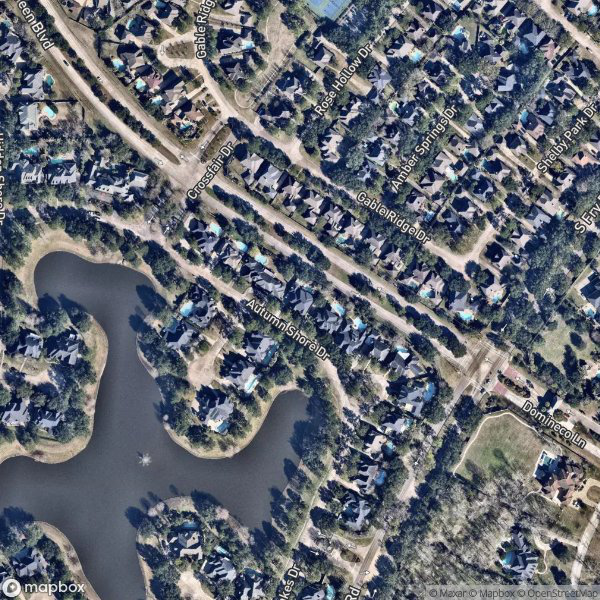

In [3]:
from PIL import Image
import requests
from io import BytesIO
longitude =-95.731003
latitude = 29.746700
zoom =16.25
tilt = 0
rotation = 0

res = requests.get(f'https://api.mapbox.com/styles/v1/mapbox/satellite-streets-v11/static/{longitude},{latitude},{zoom},{tilt}, {rotation}/600x600?access_token=pk.eyJ1IjoiYXdhaGFiIiwiYSI6ImNrdjc3NW11aTJncmIzMXExcXRiNDNxZWYifQ.tqFU7uVd6mbhHtjYsjtvlg')


image = Image.open(BytesIO(res.content))
image

In [3]:
async def _():
    pass

import inspect


inspect.iscoroutinefunction(_)


def __():
    pass

inspect.iscoroutinefunction(__)

False

In [2]:
import glob

coords = glob.glob('*_geoCoordinates.json')

import json

json.load(open(coords[0]))

['126.965727:37.59496', '126.9943448:37.5702942', '126.99215:37.59552']

In [53]:
# #given a geolocation -> output like 5 metrics 
# #hipsterness -> mentions of hipster per square mile 
# #


# #reverse - frequency of words in twitter for each city in the top 100

# # installation
# !pip install easyocr

# import easyocr

# reader = easyocr.Reader(['en'])
# extract_info = reader.readtext(img_path1)

# for el in extract_info:
#    print(el)


#characterize neighborhoods as hipster, density of _ foods, 
#for every building in negihborhood -> get classification
#mueseum, history, culture, quiet, family, loud, nightlife, parks, architecture

# safetey
#transportation

#proximity to waterfront
#sum up complaints in each area -> find complaints above norm not just density of complaint

#word cloud for reviews of google places api

#curb appeal
#https://metropolismoving.com/blog/neighborhoods-in-manhattan-explained/

#https://developer.twitter.com/en/docs/twitter-api/enterprise/rules-and-filtering/enterprise-operators#listofoperators
#https://developer.twitter.com/en/docs/twitter-api/v1/geo/places-near-location/api-reference/get-geo-search

twit_url = 'https://api.twitter.com/1.1/geo/search.json'
res = requests.post(twit_url, json={
  "lat": -0.8957793,
  "long": 119.8679974,
})

#find all bars, restauarnts and shit near an airbnb - automatically sort them
#find all blogs about place -> find words of interest


#create data sets but especially geospatial

latitude =  -0.8957793
longitude = 119.8679974



In [60]:
l=list(cache)
l

[(-4.05568501525488, 41.2948556295683),
 (119.8679974, -0.8957793),
 (73.594322, 29.95872),
 (-0.5312195, 53.172297),
 (-54.154887, -34.626067),
 (-79.450667, 43.950347),
 (8.8263532, 45.817549),
 (-0.193263, 51.501466),
 (-98.483963, 29.612465),
 (-77.029429, 38.925672),
 (-0.120666, 51.503266),
 (15.32299, 48.102374),
 (-3.86509, 56.619321),
 None,
 (-3.60824203189663, 52.3287887217459),
 (35.2, 31.88333),
 (151.206353, -33.877945),
 (-80.868475, 35.08156),
 (7.893079, 45.285328),
 (0.05532, 51.532963),
 (-71.124496, 42.255654),
 (103.165793, 31.438424),
 (-0.232347, 51.759906)]

{'type': 'Feature', 'geometry': {'coordinates': [-4.108979, 41.235559], 'type': 'Point'}, 'properties': {'name': 'Campo Segoviano 2 S. Coop', 'mapbox_id': 'CkIKQDc0ZmVhYWUwYjM2NjI4YmQ3YWE0NjE5MjE5M2ViNDUwNzNjYWI1Y2FhYjFjYjQyZGMzODI4MmE0Y2Q5ZDZhMzQ=', 'feature_type': 'poi', 'address': 'Carretera Lastras de Cuellar', 'full_address': 'Carretera Lastras de Cuellar, 40340 Aguilafuente, Spain', 'place_formatted': '40340 Aguilafuente, Spain', 'context': {'country': {'name': 'Spain', 'country_code': 'ES', 'country_code_alpha_3': 'ESP'}, 'postcode': {'name': '40340'}, 'place': {'name': 'Aguilafuente'}, 'address': {'name': 'Carretera Lastras de Cuellar', 'address_number': 'Carretera', 'street_name': 'Lastras de Cuellar'}, 'street': {'name': 'carretera lastras de cuellar'}}, 'coordinates': {'latitude': 41.235559, 'longitude': -4.108979, 'routable_points': [{'name': 'default', 'latitude': 41.23539801385105, 'longitude': -4.109065002326695}]}, 'maki': 'marker', 'poi_category': ['garden center', 'sh

{'type': 'Feature', 'geometry': {'coordinates': [73.622898, 29.945799], 'type': 'Point'}, 'properties': {'name': 'Sleepwell', 'mapbox_id': 'CkIKQDAxYmY1YjZjOThlN2VlM2JmYmE1MDRlODQxYjQ4YWM1N2EyNmM1MTQzNzQ5ZmRlMjAzZjFhMTRjZTQyMmY2NjE=', 'feature_type': 'poi', 'address': 'Sri Ganganagar Road', 'full_address': 'Sri Ganganagar Road, Karanpur, 335027, India', 'place_formatted': 'Karanpur, 335027, India', 'context': {'country': {'name': 'India', 'country_code': 'IN', 'country_code_alpha_3': 'IND'}, 'postcode': {'name': '335027'}, 'place': {'name': 'Karanpur'}, 'locality': {'name': '1u'}, 'address': {'name': 'Sri Ganganagar Road', 'address_number': 'Sri', 'street_name': 'Ganganagar Road'}, 'street': {'name': 'sri ganganagar road'}}, 'coordinates': {'latitude': 29.945799, 'longitude': 73.622898, 'routable_points': [{'name': 'default', 'latitude': 29.946214, 'longitude': 73.622625}]}, 'maki': 'marker', 'poi_category': ['mattress store', 'shopping'], 'poi_category_ids': ['mattress_store', 'shoppi

{'type': 'Feature', 'geometry': {'coordinates': [-79.453866, 43.951039], 'type': 'Point'}, 'properties': {'name': 'Food Basics', 'mapbox_id': 'CkIKQGQ1ZTAyNjlhNjIzMjg3OGVhYTZhNGMxZGMyZTc4MDkzZTlhNTZiZDZkY2E3ZTg2NzE4ZDBiZDllMWUzZDhmNzQ=', 'feature_type': 'poi', 'address': '13231 Yonge St', 'full_address': '13231 Yonge St, Richmond Hill, L4E 1B6, Canada', 'place_formatted': 'Richmond Hill, L4E 1B6, Canada', 'context': {'country': {'name': 'Canada', 'country_code': 'CA', 'country_code_alpha_3': 'CAN'}, 'postcode': {'name': 'L4E 1B6'}, 'place': {'name': 'Richmond Hill'}, 'neighborhood': {'name': 'Oak Ridges Lake Wilcox'}, 'address': {'name': '13231 Yonge St', 'address_number': '13231', 'street_name': 'Yonge St'}, 'street': {'name': 'yonge st'}}, 'coordinates': {'latitude': 43.951039, 'longitude': -79.453866, 'routable_points': [{'name': 'default', 'latitude': 43.95091559811829, 'longitude': -79.45434197868664}]}, 'maki': 'restaurant', 'poi_category': ['bakery', 'food', 'food and drink', 'g

{'type': 'Feature', 'geometry': {'coordinates': [-98.484208, 29.611017], 'type': 'Point'}, 'properties': {'name': 'File Savers Data Recovery', 'mapbox_id': 'CkIKQDM4YWE3ZmZiNjAxYWIwYmRkNzk3YThlODM5ZTMzZWVkMWEwNzQyOTAyZjY3NzMyZTM3YTRhYzMwZGZmY2QwY2E=', 'feature_type': 'poi', 'address': '227 N Loop 1604 E Ste 150', 'full_address': '227 N Loop 1604 E Ste 150, San Antonio, Texas 78232, United States of America', 'place_formatted': 'San Antonio, Texas 78232, United States of America', 'context': {'country': {'name': 'United States of America', 'country_code': 'US', 'country_code_alpha_3': 'USA'}, 'region': {'name': 'Texas', 'region_code': 'TX', 'region_code_full': 'US-TX'}, 'postcode': {'name': '78232'}, 'place': {'name': 'San Antonio'}, 'neighborhood': {'name': 'Stone Oak'}, 'address': {'name': '227 N Loop 1604 E Ste 150', 'address_number': '227', 'street_name': 'N Loop 1604 E Ste 150'}, 'street': {'name': 'n loop 1604 e'}}, 'coordinates': {'latitude': 29.611017, 'longitude': -98.484208, '

{'type': 'Feature', 'geometry': {'coordinates': [15.306227, 48.106877], 'type': 'Point'}, 'properties': {'name': 'Franz Hoertler', 'mapbox_id': 'CkIKQGE3ZDBmZjgzODI2MzNmYjNlNjNjY2ZhMjQzZTk4ZDRjYWNjMGRiZDhlZTUxNTlkY2ZhYzhlOTgzMDE1YmNlNWU=', 'feature_type': 'poi', 'address': 'Nr. 76', 'full_address': 'Nr. 76, 3354 Mank, Austria', 'place_formatted': '3354 Mank, Austria', 'context': {'country': {'name': 'Austria', 'country_code': 'AT', 'country_code_alpha_3': 'AUT'}, 'postcode': {'name': '3354'}, 'place': {'name': 'Mank'}, 'address': {'name': 'Nr. 76', 'address_number': 'Nr.', 'street_name': '76'}, 'street': {'name': '76'}}, 'coordinates': {'latitude': 48.106877, 'longitude': 15.306227, 'routable_points': [{'name': 'default', 'latitude': 48.10686875410663, 'longitude': 15.306185453383415}]}, 'maki': 'marker', 'poi_category': ['electronics', 'shopping'], 'poi_category_ids': ['electronics_shop', 'shopping'], 'external_ids': {'foursquare': '3a71b6301baf4bff840214d9'}, 'metadata': {}}}
{'type'

{'type': 'Feature', 'geometry': {'coordinates': [151.206373, -33.877328], 'type': 'Point'}, 'properties': {'name': 'World Square Shopping Centre', 'mapbox_id': 'CkIKQDU5OWMzMjcyZTNhMTUyNGNkYjM2ZjAzNjA0ZWYxYmI2YzlmMTFlZTU1NTY0NjkwOTA3ZGM5YWZiZTlmZDkyYjU=', 'feature_type': 'poi', 'address': '680 George St', 'full_address': '680 George St, Sydney 2000, Australia', 'place_formatted': 'Sydney 2000, Australia', 'context': {'country': {'name': 'Australia', 'country_code': 'AU', 'country_code_alpha_3': 'AUS'}, 'postcode': {'name': '2000'}, 'place': {'name': 'Sydney'}, 'locality': {'name': 'Sydney Central Business District'}, 'address': {'name': '680 George St', 'address_number': '680', 'street_name': 'George St'}, 'street': {'name': 'george st'}}, 'coordinates': {'latitude': -33.877328, 'longitude': 151.206373, 'routable_points': [{'name': 'default', 'latitude': -33.877212427749015, 'longitude': 151.20598271674407}]}, 'maki': 'marker', 'poi_category': ['shopping mall', 'shopping'], 'poi_catego

{'type': 'Feature', 'geometry': {'coordinates': [0.0544408, 51.5332438], 'type': 'Point'}, 'properties': {'name': 'Cost Saver', 'mapbox_id': 'CkIKQDdjOThhOWU1ZWMzYzU2ZTZjOTE3YTEyYjI4M2RjYTAwNTAwN2MzYjg1NzQzNTRhMGIyNDg0ZWQ5YTBhN2VjZDM=', 'feature_type': 'poi', 'address': 'London', 'full_address': 'London, E6 2HJ, United Kingdom', 'place_formatted': 'E6 2HJ, United Kingdom', 'context': {'country': {'name': 'United Kingdom', 'country_code': 'GB', 'country_code_alpha_3': 'GBR'}, 'postcode': {'name': 'E6 2HJ'}, 'place': {'name': 'London'}, 'locality': {'name': 'Newham'}, 'neighborhood': {'name': 'East Ham'}, 'street': {'name': 'High Street North'}}, 'coordinates': {'latitude': 51.5332438, 'longitude': 0.0544408, 'routable_points': [{'name': 'default', 'latitude': 51.53311756277457, 'longitude': 0.05435138196531947}]}, 'maki': 'marker', 'poi_category': ['convenience store', 'grocery', 'shopping'], 'poi_category_ids': ['convenience_store', 'grocery', 'shopping'], 'external_ids': {}, 'metadata

{'type': 'Feature', 'geometry': {'coordinates': [-0.22872089860443232, 51.76304791437833], 'type': 'Point'}, 'properties': {'name': 'Asda', 'mapbox_id': 'CkIKQGIyMWRlNTBkNzI1YWNkZjEyMDIyZjhjM2EzYmU5Yzk3NzE1ZTcyOWYzMWQ3ODE1ZmM0ZDEzODBhNjhhMGQ5NjA=', 'feature_type': 'poi', 'address': 'Hatfield', 'full_address': 'Hatfield, AL10 0JP, United Kingdom', 'place_formatted': 'AL10 0JP, United Kingdom', 'context': {'country': {'name': 'United Kingdom', 'country_code': 'GB', 'country_code_alpha_3': 'GBR'}, 'postcode': {'name': 'AL10 0JP'}, 'place': {'name': 'Hatfield'}, 'street': {'name': 'Town Centre'}}, 'coordinates': {'latitude': 51.76304791437833, 'longitude': -0.22872089860443232, 'routable_points': [{'name': 'default', 'latitude': 51.763356693268705, 'longitude': -0.22883807245542995}]}, 'maki': 'marker', 'poi_category': ['grocery', 'shopping', 'supermarket'], 'poi_category_ids': ['grocery', 'shopping', 'supermarket'], 'brand': ['Asda'], 'brand_id': ['asda'], 'external_ids': {'safegraph': 'z

In [53]:
coords = [-71.126085, 42.25230]
import requests
longitude = coords[0]
latitude = coords[1]
latitude, longitude = 139.766828, 35.668613

contours_minutes = 2
isochrone_url = f'https://api.mapbox.com/isochrone/v1/mapbox/driving-traffic/{latitude}%2C{longitude}?contours_minutes={contours_minutes}&polygons=true&denoise=0&generalize=0&access_token=pk.eyJ1IjoiYXdhaGFiIiwiYSI6ImNrdjc3NW11aTJncmIzMXExcXRiNDNxZWYifQ.tqFU7uVd6mbhHtjYsjtvlg'
geojson_data = requests.get(isochrone_url).json()

In [54]:
#print(coffee_shops, 'coffee_shops')
#print('geojson_data', geojson_data)
data = []
from shapely.geometry import shape, Point

for shop in coffee_shops: 
    if 'lat' not in shop or 'lon' not in shop: 
        #print(shop)
        continue
    point_to_check = Point(shop['lon'], shop['lat'])
    for feature in geojson_data['features']:
        polygon = shape(feature['geometry'])
        if polygon.contains(point_to_check):
            data.append(shop)
len(data)

27

In [55]:
coffee_shops = fetch_coffee_shops(longitude, latitude)
coffee_shops

[{'type': 'node',
  'id': 585164417,
  'lat': 35.6695915,
  'lon': 139.7653106,
  'tags': {'addr:full': '東京都中央区銀座5-10-6',
   'addr:housename': '御幸ビル1F',
   'addr:postcode': '104-0061',
   'amenity': 'cafe',
   'branch': '銀座みゆき通り店',
   'brand': 'カフェ・ベローチェ',
   'brand:en': 'CAFFÈ VELOCE',
   'brand:ja': 'カフェ・ベローチェ',
   'brand:wikidata': 'Q11294597',
   'brand:wikipedia': 'ja:カフェ・ベローチェ',
   'cuisine': 'coffee_shop',
   'level': '0',
   'name': 'カフェ・ベローチェ',
   'name:en': 'CAFFÈ VELOCE',
   'name:ja': 'カフェ・ベローチェ',
   'name:ja_rm': 'Kafe Berōche',
   'opening_hours': 'Mo-Su 07:00-23:00',
   'operator': 'シャノアール',
   'phone': '+81 3-3289-3233',
   'smoking': 'separated',
   'source': '(URL) 2015',
   'takeaway': 'yes',
   'website': 'https://chatnoir-company.com/chatnoir/html/brand/brand_veloce.html'}},
 {'type': 'node',
  'id': 1195197103,
  'lat': 35.6727334,
  'lon': 139.7673145,
  'tags': {'addr:full': '東京都中央区銀座2-7-11',
   'addr:postcode': '104-0061',
   'alt_name:en': 'Saint Marc Café',
 

In [ ]:
polygon.contain()

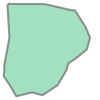

In [49]:


polygon = shape(geojson_data['features'][0]['geometry'])
polygon

In [47]:
geojson_data['features'][0]['geometry']

{'coordinates': [[[139.766828, 35.670636],
   [139.766799, 35.670642],
   [139.765857, 35.670642],
   [139.765828, 35.67065],
   [139.765794, 35.670647],
   [139.765761, 35.670613],
   [139.765758, 35.670543],
   [139.765815, 35.669626],
   [139.765815, 35.669613],
   [139.765815, 35.6696],
   [139.76566, 35.668781],
   [139.765659, 35.668613],
   [139.765641, 35.668426],
   [139.765828, 35.668148],
   [139.766025, 35.66781],
   [139.766513, 35.667928],
   [139.766828, 35.667841],
   [139.767293, 35.668148],
   [139.767568, 35.668613],
   [139.767623, 35.668818],
   [139.767828, 35.668951],
   [139.768192, 35.669249],
   [139.76829, 35.669613],
   [139.768151, 35.669936],
   [139.767828, 35.670445],
   [139.767676, 35.670461],
   [139.767018, 35.670613],
   [139.766858, 35.670643],
   [139.766828, 35.670636]]],
 'type': 'Polygon'}

In [13]:
coords_1 = [52.2296756, 21.0122287]
coords_2 = str(coords_1[0]) + ':' + str(coords_1[1])
coords_3 = coords_2.split(':')
coords_4 = [float(coords_3[0]), float(coords_3[1])]
coords_4

[52.2296756, 21.0122287]

In [77]:
import geopy.distance

coords_2 = (52.406374, 16.9251681)

 

def geoDistance(one, two):
    return geopy.distance.geodesic(one, two).km


#for each airbnb -> key by distance to closest shopping place
#all all shopping types to select box -> which lets you pick what you care about
#bookstore, bike store, clothes -> give each a coefficent from -1 to 1 ?

In [73]:
all_json[0]

{'type': 'Feature',
 'geometry': {'coordinates': [-4.108979, 41.235559], 'type': 'Point'},
 'properties': {'name': 'Campo Segoviano 2 S. Coop',
  'mapbox_id': 'CkIKQDc0ZmVhYWUwYjM2NjI4YmQ3YWE0NjE5MjE5M2ViNDUwNzNjYWI1Y2FhYjFjYjQyZGMzODI4MmE0Y2Q5ZDZhMzQ=',
  'feature_type': 'poi',
  'address': 'Carretera Lastras de Cuellar',
  'full_address': 'Carretera Lastras de Cuellar, 40340 Aguilafuente, Spain',
  'place_formatted': '40340 Aguilafuente, Spain',
  'context': {'country': {'name': 'Spain',
    'country_code': 'ES',
    'country_code_alpha_3': 'ESP'},
   'postcode': {'name': '40340'},
   'place': {'name': 'Aguilafuente'},
   'address': {'name': 'Carretera Lastras de Cuellar',
    'address_number': 'Carretera',
    'street_name': 'Lastras de Cuellar'},
   'street': {'name': 'carretera lastras de cuellar'}},
  'coordinates': {'latitude': 41.235559,
   'longitude': -4.108979,
   'routable_points': [{'name': 'default',
     'latitude': 41.23539801385105,
     'longitude': -4.109065002326695

In [40]:
import requests
address = '1600 Amphitheatre Parkway, Mountain View, CA'
address = 'SUNDAR NAGAR sneer ae'
# Replace YOUR_ACCESS_TOKEN with your Mapbox access token
#geoCode('HYDE PARK NN 5208')
#avoid this https://www.wsj.com/lifestyle/travel/vacation-hotels-flights-online-booking-fees-29262506
#traveling in a poopy way is an unseen problem

In [64]:
import glob
import json 
image_urls = glob.glob('./*.json')
import pytesseract
##put city as name of file

def parseUrl(url):
    import re
    url = "https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40"
    match = re.search(r'/rooms/(\d+)', url)
    return match.group(1)

#apt has 6 images -> get coordinates -> search in mb -> get distance from APT to closest one
# def givenListOfImagesInJson(src='0.json'):
#     imgs = json.load(open(src))
#     for _ in image_urls:
#         gm = json.load(open(_))
#         coordinates = [saveImage(_) for _ in gm]
from PIL import Image

# Open an image file
image = Image.open('_.png')

# Display the image
#image.show()

#!pip install easyocr

import easyocr


# fp='gm_395995.json'
# images=json.load(open(fp))
# #imageToCoords(images)

# response = requests.get(images[0])
# response.content
# with open('_.png', 'wb') as f:
#         f.write(response.content)
# pytesseract.image_to_string('_.png', lang='eng')

''

In [14]:
#_ =[json.load(open(_)) for _ in glob.glob('./gm*.json')]
import json
import requests
import easyocr
def imageToCoords(url_list, location='jaipur,india'):
    cache = set()

    for _ in url_list[:5]:
        if len(_) < 10: continue
        response = requests.get(_)
        if response.status_code == 200:
            with open(_[-50:-1], 'wb') as f:
                f.write(response.content)

        ocr = ocrImage(_[-50:-1])
        if not ocr: continue
        coords = geoCode(ocr)
        print(coords)
        if not coords: continue
        cache.add(str(coords[0]) + ':' + str(coords[1]))
    return list(cache)

def key_function (_):
    return _[1]

def ocrImage(fp):
    reader = easyocr.Reader(['en'])
    extract_info = reader.readtext(fp)
    #print(extract_info)
    from time import time
    sorted(extract_info, key=key_function)
    #if 0 not in extract_info: return print('wtf', extract_info)
    #print(extract_info)
    if (not extract_info): return False
    return extract_info[0][1]   

def geoCode(address = "1600 Amphitheatre Parkway, Mountain View, CA"):
    accessToken = "pk.eyJ1IjoiYXdhaGFiIiwiYSI6ImNrdjc3NW11aTJncmIzMXExcXRiNDNxZWYifQ.tqFU7uVd6mbhHtjYsjtvlg"  # Replace with your actual access token

    geocodeUrl = f"https://api.mapbox.com/geocoding/v5/mapbox.places/{address}%2C%20singapore.json?access_token={accessToken}"

    response = requests.get(geocodeUrl)
    data = response.json()

    if 'features' in data and len(data['features']) > 0:
        location = data['features'][0]['geometry']['coordinates']
        #print(f"Longitude: {location[0]}, Latitude: {location[1]}")
        return location

geocords = [imageToCoords(_) for _ in _] 
#each _ is an appartment -> 
#have to ocr 6 iamges or find a better ocr function

#ocr('_.png')
_ = json.load(open('gm_54155787.json'))
imageToCoords(_)

[103.9884945, 1.35601825]
[103.832237, 1.309447]
[103.869241, 1.412418]
[103.9884945, 1.35601825]


['103.869241:1.412418', '103.832237:1.309447', '103.9884945:1.35601825']

In [ ]:
geoCoordinates = [[75.775256, 26.897392],
[75.818982, 26.915458],
[75.822858, 26.915904],
[75.632758, 26.697753],
[6.9561, 50.944057],
[75.787137, 26.933939],
[75.804092, 26.815534],
[75.822858, 26.915904],
[75.78857, 26.919951],
[75.818982, 26.915458],
[75.775256, 26.897392],
[75.818982, 26.915458],
[75.632758, 26.697753],
[75.822858, 26.915904],
[6.9561, 50.944057],
[75.818982, 26.915458],
[6.9561, 50.944057],
[75.739386, 26.936794],
[75.804092, 26.815534],
[30.203709, 59.987311],
[75.784422, 26.8726],
[75.203905, 26.464273],]


def getPlacesOfInterest(aptGeoLocation):
#     print(aptGeoLocation)
#     aptGeoLocation = aptGeoLocation.split(':')
#     aptGeoLocation =  [float(aptGeoLocation[0]), float(aptGeoLocation[1])]
    all_json = []
    latitude = aptGeoLocation[0]
    longitude = aptGeoLocation[1]
    url = f""" https://api.mapbox.com/search/searchbox/v1/category/shopping?access_token=pk.eyJ1Ijoic2VhcmNoLW1hY2hpbmUtdXNlci0xIiwiYSI6ImNrNnJ6bDdzdzA5cnAza3F4aTVwcWxqdWEifQ.RFF7CVFKrUsZVrJsFzhRvQ&language=en&limit=20&proximity={longitude}%2C%20{latitude}"""
    _ = requests.get(url).json()
    print(_)
    for place in _['features']:
        #print(place)
        all_json.append(place)
    poi = []
    for place in all_json:
        coords = place['geometry']['coordinates']
        categories = place['properties']['poi_category']
        poi.append([coords, categories])
        #print(place)
    sorted(poi, key=lambda _: geoDistance(_[0], aptGeoLocation))
    return geoDistance(poi[0][0], aptGeoLocation)


distance = [getPlacesOfInterest(geoCoordinate) for geoCoordinate in geoCoordinates]

In [82]:
shit = [([[193, 25], [255, 25], [255, 39], [193, 39]], 'REC COL', 0.8501251496426608), ([[1, 75], [57, 75], [57, 91], [1, 91]], 'AWALA', 0.9991425927777027), ([[0, 94], [24, 94], [24, 102], [0, 102]], '4iG', 0.1567160244474485), ([[191, 99], [245, 99], [245, 117], [191, 117]], 'BLOCK', 0.9795149986694393), ([[199, 115], [233, 115], [233, 129], [199, 129]], 'Elilich', 0.11260652166395571), ([[222.71963120067105, 38.463557440805246], [254.6924656801795, 35.93437346062772], [256.280368799329, 53.536442559194754], [224.3075343198205, 55.06562653937228]], 'REC', 0.982265947512128), ([[215.21913119055696, 53.375304952445575], [253.8788534316657, 47.52290813709577], [255.78086880944304, 62.624695047554425], [217.1211465683343, 67.47709186290423]], 'TlF', 0.0781317186115469), ([[150.21913119055696, 82.37530495244557], [189.91785703596014, 78.60308884931453], [191.78086880944304, 91.62469504755443], [151.08214296403986, 95.39691115068547]], 'Vaishali ~', 0.3651379495284656), ([[189.57006641960766, 76.09713948117607], [217.9953500135553, 85.90367580513981], [213.42993358039234, 98.90286051882393], [185.0046499864447, 89.09632419486019]], 'Mg', 0.38071738696253066)]
shit



shit[0]

([[193, 25], [255, 25], [255, 39], [193, 39]], 'REC COL', 0.8501251496426608)

In [ ]:
#distance to POI 
#add columns for hipsterish, craft beer variety, properties of an area that were hard to google
#some areas -> really cool art
#some areas -> really great parks
#some areas -> things people said on twitter -> 5 characteristics of neighborhood 
#proximity to water -> graph search -> search through geoJSON features 
async def getAirbnbForCityAndGetDistanceToPoI(location):
    await main(location)
    #saveImage -> get lat long from city for each address
    #for each address -> get POI
    #then calc distance for each address to POI
    #add more interesting + useful things
    
await getAirbnbForCityAndGetDistanceToPoI('cario,egypt')

https://www.airbnb.com/rooms/46930761?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2024-01-12&check_out=2024-01-17&source_impression_id=p3_1694798371_KgiWhf5fdBzYE7iV&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/46930761?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2024-01-12&check_out=2024-01-17&source_impression_id=p3_1694798371_KgiWhf5fdBzYE7iV&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/46930761?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2024-01-12&check_out=2024-01-17&source_impression_id=p3_1694798371_KgiWhf5fdBzYE7iV&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airb

saving to cario-- egypt.json
https://www.airbnb.com/rooms/10312510?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694798371_%2BJRG0HA6LXSX2rOz&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/10312510?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694798371_%2BJRG0HA6LXSX2rOz&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/10312510?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694798371_%2BJRG0HA6LXSX2rOz&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to 

saving to cario-- egypt.json
https://www.airbnb.com/rooms/41895203?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-11-11&check_out=2023-11-16&source_impression_id=p3_1694798371_ls7U5t3YGXLJrEib&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/41895203?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-11-11&check_out=2023-11-16&source_impression_id=p3_1694798371_ls7U5t3YGXLJrEib&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-- egypt.json
https://www.airbnb.com/rooms/41895203?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-11-11&check_out=2023-11-16&source_impression_id=p3_1694798371_ls7U5t3YGXLJrEib&previous_page_section_name=1000&federated_search_id=9b246716-c8b6-4616-8505-8005eb159fe2 cario-- egypt
saving to cario-

In [52]:
list(cache)

{(-0.120666, 51.503266),
 (-0.193263, 51.501466),
 (-0.232347, 51.759906),
 (-0.5312195, 53.172297),
 (-3.60824203189663, 52.3287887217459),
 (-3.86509, 56.619321),
 (-4.05568501525488, 41.2948556295683),
 (-54.154887, -34.626067),
 (-71.124496, 42.255654),
 (-77.029429, 38.925672),
 (-79.450667, 43.950347),
 (-80.868475, 35.08156),
 (-98.483963, 29.612465),
 (0.05532, 51.532963),
 (103.165793, 31.438424),
 (119.8679974, -0.8957793),
 (15.32299, 48.102374),
 (151.206353, -33.877945),
 (35.2, 31.88333),
 (7.893079, 45.285328),
 (73.594322, 29.95872),
 (8.8263532, 45.817549),
 None}

In [1]:
docs ='https://reflect.site/g/awahab/win-kaggle-w-english/22ab82085c9143b194b81c6111266145'

import requests

r= requests.get(docs)
#r.text

from bs4 import BeautifulSoup

_ = BeautifulSoup(r.text)
#_.text

In [8]:
subprocess.run(['node', 'airbnb_get_img_url.js', 'jaipur--india_apt.json'])


https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 0



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 0.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 1



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 1.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 2



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 2.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 3



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 3.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 4



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 4.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 5



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 5.json
https://www.airbnb.com/rooms/14999327?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_wijqb4%2BfmNG2emuz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 6



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 6.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 7



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 7.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 8



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 8.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 9



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 9.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 10



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 10.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 11



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 11.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 12



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 12.json
https://www.airbnb.com/rooms/53595439?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_3fwtW2TCfAmKPqwj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 13



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 13.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 14



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 14.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 15



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 15.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 16



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 16.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 17



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 17.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 18



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 18.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 19



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 19.json
https://www.airbnb.com/rooms/52016244?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_tbQCUhS48WXJtIdC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 20



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 20.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 21



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 21.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 22



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 22.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 23



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 23.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 24



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 24.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 25



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 25.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 26



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 26.json
https://www.airbnb.com/rooms/568469202446699701?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-05&check_out=2023-10-10&source_impression_id=p3_1694806265_ocByT8KRMA6qQWn7&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 27



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 27.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 28



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 28.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 29



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 29.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 30



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 30.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 31



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 31.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 32



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 32.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 33



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 33.json
https://www.airbnb.com/rooms/53929516?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_zzlRmv%2FfQDCJhs9j&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 34



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 34.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 35



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 35.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 36



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 36.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 37



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 37.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 38



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 38.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 39



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 39.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 40



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 40.json
https://www.airbnb.com/rooms/395995?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-07&check_out=2023-10-12&source_impression_id=p3_1694806265_enT2TGOwvTQYP22E&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 41



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 41.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 42



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 42.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 43



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 43.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 44



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 44.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 45



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 45.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 46



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 46.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 47



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 47.json
https://www.airbnb.com/rooms/633725681326041018?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-20&check_out=2023-09-25&source_impression_id=p3_1694806265_vnR5DLCvsM72h0Xn&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 48



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 48.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 49



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 49.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 50



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 50.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 51



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 51.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 52



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 52.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 53



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 53.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 54



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 54.json
https://www.airbnb.com/rooms/39492966?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-24&check_out=2023-09-29&source_impression_id=p3_1694806265_eXWUNtCdzSJvDeE%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 55



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 55.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 56



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 56.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 57



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 57.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 58



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 58.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 59



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 59.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 60



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 60.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 61



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 61.json
https://www.airbnb.com/rooms/53443900?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_lL7ukfINaS5JUNKQ&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 62



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 62.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 63



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 63.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 64



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 64.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 65



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 65.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 66



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 66.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 67



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 67.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 68



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 68.json
https://www.airbnb.com/rooms/26915847?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-16&check_out=2023-09-21&source_impression_id=p3_1694806265_diX0761b8%2B2So5%2Fl&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 69



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 69.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 70



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 70.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 71



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 71.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 72



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 72.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 73



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 73.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 74



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 74.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 75



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 75.json
https://www.airbnb.com/rooms/47912628?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-18&check_out=2023-09-23&source_impression_id=p3_1694806265_TvkBbghzWgxsKZQR&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 76



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 76.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 77



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 77.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 78



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 78.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 79



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 79.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 80



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 80.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 81



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 81.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 82



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 82.json
https://www.airbnb.com/rooms/888814635742597498?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-10&check_out=2023-10-15&source_impression_id=p3_1694806265_fMzgZYia%2FDYa5wI6&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 83



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 83.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 84



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 84.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 85



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 85.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 86



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 86.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 87



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 87.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 88



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 88.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 89



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 89.json
https://www.airbnb.com/rooms/848925627265588729?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-11&check_out=2023-10-16&source_impression_id=p3_1694806265_ww%2FWbdcfQXlG%2FBAC&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 90



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 90.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 91



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 91.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 92



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 92.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 93



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 93.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 94



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 94.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 95



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 95.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 96



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 96.json
https://www.airbnb.com/rooms/819334516129046705?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-25&check_out=2023-09-30&source_impression_id=p3_1694806265_TkEQ5M6JvZeayzoU&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 97



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 97.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 98



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 98.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 99



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 99.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 100



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 100.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 101



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 101.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 102



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 102.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 103



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 103.json
https://www.airbnb.com/rooms/12380571?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_bh8WeyEDVX3L6pIz&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 104



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 104.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 105



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 105.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 106



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 106.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 107



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 107.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 108



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 108.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 109



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 109.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 110



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 110.json
https://www.airbnb.com/rooms/40029547?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_qNRxP2iW%2BsgJRsFi&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 111



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 111.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 112



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 112.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 113



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 113.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 114



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 114.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 115



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 115.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 116



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 116.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 117



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 117.json
https://www.airbnb.com/rooms/53601522?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694806265_F%2BQPxtSmCtqU8Ddj&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 118



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 118.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 119



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 119.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 120



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 120.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 121



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 121.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 122



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 122.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 123



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 123.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 124



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 124.json
https://www.airbnb.com/rooms/21363658?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-10-15&check_out=2023-10-20&source_impression_id=p3_1694806265_9ywrM3JxkoiBHIp%2F&previous_page_section_name=1000&federated_search_id=c9de1c68-04a4-4dce-8f81-60648418af40 125



  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



saving to 125.json


CompletedProcess(args=['node', 'airbnb_get_img_url.js', 'jaipur--india_apt.json'], returncode=0)

In [18]:
import requests
import json

def fetch_cafes(minlat, minlon, maxlat, maxlon):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = f"""
    [out:json];
    (
        node["amenity"="cafe"]({minlat},{minlon},{maxlat},{maxlon});
        way["amenity"="cafe"]({minlat},{minlon},{maxlat},{maxlon});
        relation["amenity"="cafe"]({minlat},{minlon},{maxlat},{maxlon});
    );
    out body;
    >;
    out skel qt;
    """
    response = requests.get(overpass_url, params={'data': overpass_query})
    data = response.json()
    return data

# Example usage:
minlat, minlon, maxlat, maxlon = 40.7128, -74.0060, 40.7138, -73.0050  # Example coordinates for New York City
cafes = fetch_cafes(minlat, minlon, maxlat, maxlon)
print(json.dumps(cafes, indent=4))

{
    "version": 0.6,
    "generator": "Overpass API 0.7.61.5 4133829e",
    "osm3s": {
        "timestamp_osm_base": "2023-09-16T22:25:55Z",
        "copyright": "The data included in this document is from www.openstreetmap.org. The data is made available under ODbL."
    },
    "elements": [
        {
            "type": "node",
            "id": 2422377040,
            "lat": 40.7131024,
            "lon": -73.9623534,
            "tags": {
                "addr:city": "Brooklyn",
                "addr:housenumber": "328",
                "addr:postcode": "11211",
                "addr:street": "Bedford Avenue",
                "amenity": "cafe",
                "check_date": "2023-04-22",
                "internet_access": "no",
                "name": "Oslo Coffee Roasters",
                "website": "https://oslocoffee.com/"
            }
        },
        {
            "type": "node",
            "id": 3199078271,
            "lat": 40.7129493,
            "lon": -73.9555025,


In [17]:
getCityList().keys()

dict_keys(['Europe', 'North America', 'Asia', 'South America', 'Africa', 'Australia and Oceania', 'Others/Islands', 'Lesser-known Gems', 'For Nature Lovers'])

In [16]:
#2 cities
#moscow 

def getCityList():
    return {
  "Europe": [
    "Paris, France",
    "Rome, Italy",
    "Barcelona, Spain",
    "Amsterdam, Netherlands",
    "London, United Kingdom",
    "Prague, Czech Republic",
    "Vienna, Austria",
    "Budapest, Hungary",
    "Berlin, Germany",
    "Athens, Greece",
    "Venice, Italy",
    "Lisbon, Portugal",
    "Copenhagen, Denmark",
    "Stockholm, Sweden",
    "Edinburgh, Scotland",
    "Dublin, Ireland",
    "Reykjavik, Iceland",
    "Madrid, Spain",
    "Oslo, Norway",
    "Zurich, Switzerland"
  ],
  "North America": [
    "New York City, USA",
    "San Francisco, USA",
    "Vancouver, Canada",
    "New Orleans, USA",
    "Los Angeles, USA",
    "Chicago, USA",
    "Toronto, Canada",
    "Mexico City, Mexico",
    "Montreal, Canada",
    "Boston, USA",
    "Miami, USA",
    "Austin, USA",
    "Quebec City, Canada",
    "Seattle, USA",
    "Nashville, USA"
  ],
  "Asia": [
    "Tokyo, Japan",
    "Kyoto, Japan",
    "Bangkok, Thailand",
    "Hong Kong, China",
    "Singapore, Singapore",
    "Seoul, South Korea",
    "Beijing, China",
    "Dubai, UAE",
    "Taipei, Taiwan",
    "Istanbul, Turkey",
    "Hanoi, Vietnam",
    "Jerusalem, Israel",
    "Mumbai, India",
    "Kuala Lumpur, Malaysia",
    "Jaipur, India"
  ],
  "South America": [
    "Rio de Janeiro, Brazil",
    "Buenos Aires, Argentina",
    "Cartagena, Colombia",
    "Lima, Peru",
    "Santiago, Chile",
    "Cusco, Peru",
    "Medellín, Colombia",
    "Quito, Ecuador",
    "Montevideo, Uruguay",
    "Bogota, Colombia"
  ],
  "Africa": [
    "Cape Town, South Africa",
    "Marrakech, Morocco",
    "Cairo, Egypt",
    "Dakar, Senegal",
    "Zanzibar City, Tanzania",
    "Accra, Ghana",
    "Addis Ababa, Ethiopia",
    "Victoria Falls, Zimbabwe/Zambia",
    "Nairobi, Kenya",
    "Tunis, Tunisia"
  ],
  "Australia and Oceania": [
    "Sydney, Australia",
    "Melbourne, Australia",
    "Auckland, New Zealand",
    "Wellington, New Zealand",
    "Brisbane, Australia"
  ],
  "Others/Islands": [
    "Honolulu, Hawaii, USA",
    "Bali, Indonesia",
    "Santorini, Greece",
    "Maldives (Male)",
    "Phuket, Thailand",
    "Ibiza, Spain",
    "Seychelles (Victoria)",
    "Havana, Cuba",
    "Punta Cana, Dominican Republic",
    "Dubrovnik, Croatia"
  ],
  "Lesser-known Gems": [
    "Ljubljana, Slovenia",
    "Tallinn, Estonia",
    "Riga, Latvia",
    "Sarajevo, Bosnia and Herzegovina",
    "Vilnius, Lithuania",
    "Tbilisi, Georgia",
    "Yerevan, Armenia",
    "Baku, Azerbaijan",
    "Belgrade, Serbia",
    "Skopje, North Macedonia"
  ],
  "For Nature Lovers": [
    "Banff, Canada",
    "Queenstown, New Zealand",
    "Reykjavik (as a gateway to Icelandic nature)",
    "Ushuaia, Argentina (Gateway to Antarctica)",
    "Kathmandu, Nepal (Gateway to the Himalayas)"
  ]
}


locations = getCityList()

    
    


import json
import asyncio
from pyppeteer import launch


async def delay(seconds):
    await asyncio.sleep(seconds)

links = []
headless = True

async def get_img_url(apt_listing, idx):
    print(apt_listing, idx)
    browser = await launch(headless=headless)
    page = await browser.newPage()
    await page.setViewport({'width': 1920, 'height': 1080})
    await page.goto(apt_listing)

    await page.waitForSelector('section')

    await page.evaluate('''() => {
        window.scrollBy(0, 100000);
    }''')

    await delay(3)

    await page.evaluate('''() => {
        //window.scrollBy(0, 100000);
        //document.querySelectorAll('.hnwb2pb.dir.dir-ltr')[3]?.scrollIntoView()
        //document?.querySelector('.cj0q2ib.sne7mb7.rp6dtyx.c1y4i074.dir.dir-ltr').click()
    }''')

    await delay(1)

    selector = '.gm-style img'
    img_urls = await page.querySelectorAllEval(selector, 'img => img.map(i => i.src).filter(src => src.indexOf("maps.googleapis.com") !== -1)')

    print('saving to ' + f'{idx}.json')
    with open(f'{idx}.json', 'w') as f:
        json.dump(img_urls, f)

    #print(img_urls)
    #await browser.close()
    return img_urls

async def get_apt(url, location):
    browser = await launch(headless=headless)
    page = await browser.newPage()

    await page.goto(url)
    qs = '.cy5jw6o.dir.dir-ltr a'

    try:
        await page.waitForSelector(qs)
    except:
      return []

    # Placeholder for your logic to extract tweets, adapt as needed
    tweets = await page.querySelectorAllEval(qs, '''tweets => {
        return tweets.map(tweet => ({
            link: tweet.href
        }));
    }''')

    #print(tweets)
    #link += tweets

    await browser.close()
    with open(f'{location}_apt.json', 'w') as f:
        json.dump(tweets, f)
    return tweets

#if __name__ == "__main__":
#fn = input("Enter function to execute (get_apt/get_img_url): ")
#if fn == 'get_apt':
#    asyncio.get_event_loop().run_until_complete(get_apt())
#elif fn == 'get_img_url':
    #apt_listing = input("Enter the apartment listing URL: ")
apt_listing = 'https://www.airbnb.com/rooms/586166376600248074?adults=1&category_tag=Tag%3A8522&children=0&enable_m3_private_room=true&infants=0&pets=0&photo_id=1457367815&search_mode=flex_destinations_search&check_in=2023-09-14&check_out=2023-09-19&source_impression_id=p3_1694719767_8kxnr2mVDAfpYdMo&previous_page_section_name=1000&federated_search_id=62cba934-7640-4911-b5c5-cb37f6420f19'
#asyncio.get_event_loop().run_until_complete(get_img_url(apt_listing))

#for city in list of cities
#search airbnb
#cache listing_url in json
#for listing_url -> get geo-coordinate

#check availability weekly -> 7 million = 
#86,400 seconds => 1 computer 

import asyncio
#loop = asyncio.get_event_loop()
#loop.create_task(get_img_url(apt_listing))
def getAllApt_(location):
    return ['hello world']

#make server async -> 10 ?? 
#use nodejs subprocess -> 2 min 
async def getAllAptForLocation(location):
    location = location.replace(',','--')
    url = f'https://www.airbnb.com/s/{location}/homes' 
    task = asyncio.create_task(get_apt(url, location)) #get 18 apt urls 
    return await task

async def main(location):
    # run my_coroutine as a task
    task = getAllAptForLocation(location)

    url = await task
    #return print('task done', len(url))
    for idx, url in enumerate(url):
        task = asyncio.create_task(get_img_url(url['link'], location))
        #task = asyncio.create_task(get_img_url(apt_listing))
        await task

# run main() in the current event loop
# for location in locations['Asia']:
#     print('lets go to ' + location)
#     await main(location)

In [43]:
#get every property on airbnb
#get every house in the world
#get every appartment in the world
#re-index every 24 hours

#make it simple to "suitability-analysis" each one with 10-20 columns or whatever is available in that city
#make an "admin UI" that is viewable by all so everyone can see all the different data for geospatial 




#also do timeseries
#also do tabular data

#geospatial ETA - 1 week
url

['https://maps.googleapis.com/maps/vt?pb=!1m5!1m4!1i14!2i11707!3i6832!4i256!2m3!1e0!2sm!3i662403161!3m17!2sen!3sUS!5e18!12m4!1e68!2m2!1sset!2sRoadmap!12m3!1e37!2m1!1ssmartmaps!12m4!1e26!2m2!1sstyles!2zcy50OjF8cy5lOmwudC5mfHAuYzojZmY4Zjk3ODcscy50OjF8cy5lOmwudC5zfHAudzoxLHMudDoxN3xzLmU6bC50LmZ8cC5jOiNmZjRiNGU0YyxzLnQ6MTd8cy5lOmwudC5zfHAudzoxLHMudDoxOXxzLmU6bHxwLnY6b2ZmfHo6NXxwLnY6b258ejo2fHAudjpvbnx6Ojd8cC52Om9uLHMudDoxOXxzLmU6bC50LmZ8cC5jOiNmZjRiNGU0Y3x6OjV8cC5jOiNmZjU3NjA1MnxwLnY6b258ejoxMnxwLmM6I2ZmNmE2ZDcwLHMudDoxOXxzLmU6bC50LnN8cC52Om9mZnxwLnc6MSxzLnQ6MjB8cy5lOmwudHxwLnY6b24scy50OjIwfHMuZTpsLnQuZnxwLmM6I2ZmYWNiMmI5LHMudDoyMHxzLmU6bC50LnN8cC53OjIscy50OjE4fHMuZTpsLnQuZnxwLmM6I2ZmNGI0ZTRjfHo6N3xwLmM6I2ZmNjM2ZTdlLHMudDoxOHxzLmU6bC50LnN8cC53OjEscy50OjgxfHMuZTpnLmZ8cC5jOiNmZmY4ZjRmMSxzLnQ6ODF8cy5lOmwudHxwLnY6b2ZmLHMudDoxMjk3fHMuZTpnLmZ8cC5jOiNmZmU4ZWFlZHx6OjE3fHAudjpvZmZ8ejoxOHxwLmM6I2ZmZjNlY2U3fHAudjpvbnx6OjIwfHAudjpvbixzLnQ6MTI5N3xzLmU6Zy5zfHAuYzojZmZkYWRjZTJ8cC52Om9ufHo6MTd8cC52Om9mZnx

In [68]:
#Image(url=i).
import requests



#pytesseract.image_to_string()
#Image(filename='./local_image.jpg')



In [13]:
import os

#import os
os.listdir()

#print('local_image.jpg' in os.listdir())

#'local_image.jpg' in os.listdir()

['downloaded_file_7.pdf',
 'downloaded_file_14.pdf',
 'client.js',
 'downloaded_file_15.pdf',
 'downloaded_file_6.pdf',
 '20.json',
 '16.json',
 'downloaded_file_4.pdf',
 'downloaded_file_17.pdf',
 'downloaded_file_16.pdf',
 'downloaded_file_5.pdf',
 '14!2i11705!3i6831!4i256!2m3!1e0!2sm!3i662403173!3m',
 '6.json',
 '7.json',
 'index.html',
 '.DS_Store',
 'downloaded_file_12.pdf',
 'downloaded_file_1.pdf',
 '14!2i11709!3i6831!4i256!2m3!1e0!2sm!3i662403173!3m',
 '14!2i11707!3i6831!4i256!2m3!1e0!2sm!3i662403173!3m',
 'downloaded_file_0.pdf',
 'downloaded_file_13.pdf',
 '17.json',
 '14!2i11709!3i6833!4i256!2m3!1e0!2sm!3i662403161!3m',
 '14!2i11707!3i6833!4i256!2m3!1e0!2sm!3i662403161!3m',
 'airbnb_map.json',
 '14!2i11708!3i6833!4i256!2m3!1e0!2sm!3i662403161!3m',
 'downloaded_file_11.pdf',
 '21.json',
 'downloaded_file_2.pdf',
 '#client.js#',
 '14!2i11708!3i6831!4i256!2m3!1e0!2sm!3i662403173!3m',
 'downloaded_file_3.pdf',
 'downloaded_file_10.pdf',
 '14!2i11706!3i6831!4i256!2m3!1e0!2sm!3i66

In [36]:
#! pip install pytesseract
import pytesseract
#pytesseract.image_to_string(, lang='eng')
print(pytesseract.image_to_string(Image.open('_.png'), lang='eng'))


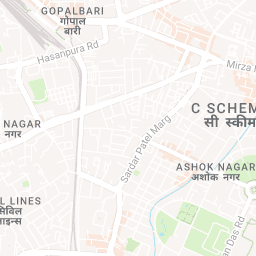

In [37]:
Image.open('_.png')

In [18]:
import json
import requests
import pytesseract
url = json.load(open('./airbnb_map.json'))



for i in url:
    #from IPython.display import display, Image
    saveImage(i)
    # Display an image from a URL
    #display(Image(url=i))
    



(hosp? seep 3
















In [3]:
#! pip install pyppeteer
#https://github.com/pyppeteer/pyppeteer
import subprocess

location = 'jaipur--india'
args = [
    "node",
    "getAptInCity.js",
    location
]

# Execute the command
# try:
#result = subprocess.run(command, check=True)
# except subprocess.CalledProcessError as e:
#     print(f"The command failed with error: {e}")
completed_process = subprocess.run(args
                                   #, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True
                                   )


  Puppeteer old Headless deprecation warning:
    In the near future `headless: true` will default to the new Headless mode
    for Chrome instead of the old Headless implementation. For more
    information, please see https://developer.chrome.com/articles/new-headless/.
    Consider opting in early by passing `headless: "new"` to `puppeteer.launch()`
    If you encounter any bugs, please report them to https://github.com/puppeteer/puppeteer/issues/new/choose.



writing jaipur--india_apt.json


In [31]:

args = [
    "node",
    "RPC/fetchAirbnb.js",
    "get_img_url",
    "https://www.airbnb.com/rooms/46167540?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694700080_UjFiBEV3n8iEBFMu&previous_page_section_name=1000&federated_search_id=c852781b-8f44-4187-a236-0aeb4c288fa8"
]

# Execute the command
# try:
#result = subprocess.run(command, check=True)
# except subprocess.CalledProcessError as e:
#     print(f"The command failed with error: {e}")
completed_process = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)
stdout = completed_process.stdout.decode()
stderr = completed_process.stderr.decode()

CalledProcessError: Command '['node', 'RPC/fetchAirbnb.js', 'get_img_url', 'https://www.airbnb.com/rooms/46167540?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694700080_UjFiBEV3n8iEBFMu&previous_page_section_name=1000&federated_search_id=c852781b-8f44-4187-a236-0aeb4c288fa8']' returned non-zero exit status 1.

In [35]:
args = [
    "node",
    "RPC/fetchAirbnb.js",
    "get_img_url",
    "https://www.airbnb.com/rooms/46167540?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694700080_UjFiBEV3n8iEBFMu&previous_page_section_name=1000&federated_search_id=c852781b-8f44-4187-a236-0aeb4c288fa8"
]

output = subprocess.check_output(args)

result = output
result

b''

In [3]:
import subprocess


url = "node RPC/fetchAirbnb.js  get_img_url 'https://www.airbnb.com/rooms/46167540?adults=1&children=0&enable_m3_private_room=true&infants=0&pets=0&check_in=2023-09-17&check_out=2023-09-22&source_impression_id=p3_1694700080_UjFiBEV3n8iEBFMu&previous_page_section_name=1000&federated_search_id=c852781b-8f44-4187-a236-0aeb4c288fa8'"
subprocess.call(url.split(' '))

0

In [ ]:
from PIL import Image

import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'<full_path_to_your_tesseract_executable>'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# Simple image to string
print(pytesseract.image_to_string(Image.open('test.png')))

# In order to bypass the image conversions of pytesseract, just use relative or absolute image path
# NOTE: In this case you should provide tesseract supported images or tesseract will return error
print(pytesseract.image_to_string('test.png'))

# List of available languages
print(pytesseract.get_languages(config=''))

# French text image to string
print(pytesseract.image_to_string(Image.open('test-european.jpg'), lang='fra'))
# Batch processing with a single file containing the list of multiple image file paths
print(pytesseract.image_to_string('images.txt'))

# Timeout/terminate the tesseract job after a period of time
try:
    print(pytesseract.image_to_string('test.jpg', timeout=2)) # Timeout after 2 seconds
    print(pytesseract.image_to_string('test.jpg', timeout=0.5)) # Timeout after half a second
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    pass

# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open('test.png')))

# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(Image.open('test.png')))

# Get information about orientation and script detection
print(pytesseract.image_to_osd(Image.open('test.png')))

# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr('test.png', extension='hocr')

# Get ALTO XML output
xml = pytesseract.image_to_alto_xml('test.png')
#Support for OpenCV image/NumPy array objects

# import cv2

# img_cv = cv2.imread(r'/<path_to_image>/digits.png')

# # By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# # we need to convert from BGR to RGB format/mode:
# img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
# print(pytesseract.image_to_string(img_rgb))
# # OR
# img_rgb = Image.frombytes('RGB', img_cv.shape[:2], img_cv, 'raw', 'BGR', 0, 0)
# print(pytesseract.image_to_string(img_rgb))

In [262]:
trees_map()

[['latitude', 'longitude'],
 ['40.72309177', '-73.84421522'],
 ['40.79411067', '-73.81867946'],
 ['40.71758074', '-73.9366077'],
 ['40.71353749', '-73.93445616'],
 ['40.66677776', '-73.97597938'],
 ['40.77004563', '-73.98494997'],
 ['40.77020969', '-73.98533807'],
 ['40.76272385', '-73.98729652'],
 ['40.59657931', '-74.07625483'],
 ['40.58635725', '-73.96974394'],
 ['40.78242823', '-73.91117077'],
 ['40.78173511', '-73.91201957'],
 ['40.55710259', '-74.16267038'],
 ['40.69473314', '-73.96821054'],
 ['40.6643174', '-73.92113023'],
 ['40.69331418', '-73.96760066'],
 ['40.59378755', '-73.9915968'],
 ['40.64878769', '-73.96452447'],
 ['40.73764622', '-73.86529992'],
 ['40.69149917', '-73.97258754'],
 ['40.66123875', '-73.98588944'],
 ['40.77217148', '-73.96045571'],
 ['40.7820872', '-73.98096428'],
 ['40.56882124', '-74.1385634'],
 ['40.67483919', '-73.97218377'],
 ['40.59493629', '-73.98917143'],
 ['40.70653352', '-73.82499155'],
 ['40.61190461', '-73.97042748'],
 ['40.72180744', '-73.989

In [261]:
#take the text from my favorite books and render all the passages 
#create javascript bookmarklets and execute on them on pages
#make a chrome extension -> extract text from book and visualie and make notes
#make flash cards 
#make actions and functions that dont exist in programming languages 

# render a 3d model
# simplify the triangles from center to right side
# add a bezel on left hand corner - line by line execution -> CR line by line 



# for all news articles in Economist for last year
# find which ones have most relevance to astrophysics 


# make a game

# play a game 
# run forward 
# shoot lemons 
# jump every 5 seconds


# when i leave home
# ask rosy to wash dishes, clean bed, and empty litter box
# if run out of litter or laundry detergent or tortillas, order from instacart 






##https://www.zenrows.com/blog/pyppeteer#use

#how to make best magic english notebook ever
#write 5 noetbooks -> make code super clean and well documented -> use cursor -> relearn emacs 
#make it so people can easily contribute by reading notebook and adding their own function






def trees_map():
    trees_CSV = 'data/2015_Street_Tree_Census_-_Tree_Data.csv'
    from collections import defaultdict
    pointList = []

    with open(trees_CSV) as file:
        for sentence in file:
            parameters = sentence.split(',')
            pointList.append(parameters[-8:-6])
    return pointList[1:]


def trees_histogram():
    trees_CSV = 'data/2015_Street_Tree_Census_-_Tree_Data.csv'
    from collections import defaultdict
    counter = defaultdict(int)

    with open(trees_CSV) as file:
        for sentence in file:
            parameters = sentence.split(',')
            count = parameters[8]
            counter[count] += 1
    return counter


tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status  \
0        180683    348711  08/27/2015         3           0   OnCurb  Alive   
1        200540    315986  09/03/2015        21           0   OnCurb  Alive   
2        204026    218365  09/05/2015         3           0   OnCurb  Alive   
3        204337    217969  09/05/2015        10           0   OnCurb  Alive   
4        189565    223043  08/30/2015        21           0   OnCurb  Alive   
...         ...       ...         ...       ...         ...      ...    ...   
683783   155433    217978  08/18/2015        25           0   OnCurb  Alive   
683784   183795    348185  08/29/2015         7           0   OnCurb  Alive   
683785   166161    401670  08/22/2015        12           0   OnCurb  Alive   
683786   184028    504204  08/29/2015         9           0   OnCurb  Alive   
683787   200607    306527  09/03/2015        23           0   OnCurb  Alive   

       health                           spc_latin           spc_common  ...  \
0        Fair                         Acer rubrum            red maple  ...   
1        Fair                   Quercus palustris              pin oak  ...   
2        Good  Gleditsia triacanthos var. inermis          honeylocust  ...   
3        Good  Gleditsia triacanthos var. inermis          honeylocust  ...   
4        Good                     Tilia americana      American linden  ...   
...       ...                                 ...                  ...  ...   
683783   Good                   Quercus palustris              pin oak  ...   
683784   Good                 Cladrastis kentukea  Kentucky yellowwood  ...   
683785   Good                         Acer rubrum            red maple  ...   
683786   Good                         Acer rubrum            red maple  ...   
683787   Fair                         Acer rubrum            red maple  ...   

        boro_ct     state   latitude  longitude          x_sp         y_sp  \
0       4073900  New York  40.723092 -73.844215  1.027431e+06  202756.7687   
1       4097300  New York  40.794111 -73.818679  1.034456e+06  228644.8374   
2       3044900  New York  40.717581 -73.936608  1.001823e+06  200716.8913   
3       3044900  New York  40.713537 -73.934456  1.002420e+06  199244.2531   
4       3016500  New York  40.666778 -73.975979  9.909138e+05  182202.4260   
...         ...       ...        ...        ...           ...          ...   
683783  3051900  New York  40.713211 -73.954944  9.967407e+05  199121.6363   
683784  4070700  New York  40.715194 -73.856650  1.023989e+06  199873.6475   
683785  5020100  New York  40.620762 -74.136517  9.463514e+05  165466.0763   
683786  2023502  New York  40.850828 -73.903115  1.011054e+06  249271.9507   
683787  4134100  New York  40.732165 -73.787526  1.043136e+06  206095.5383   

       council district census tract        bin           bbl  
0                  29.0        739.0  4052307.0  4.022210e+09  
1                  19.0        973.0  4101931.0  4.044750e+09  
2                  34.0        449.0  3338310.0  3.028870e+09  
3                  34.0        449.0  3338342.0  3.029250e+09  
4                  39.0        165.0  3025654.0  3.010850e+09  
...                 ...          ...        ...           ...  
683783             34.0        519.0  3062513.0  3.023690e+09  
683784             29.0        707.0  4075448.0  4.031810e+09  
683785             50.0        201.0  5011657.0  5.004080e+09  
683786             15.0      23502.0  2007757.0  2.028120e+09  
683787             24.0       1341.0  4153657.0  4.071360e+09  

[683788 rows x 45 columns]

In [249]:
json.load(open('./data/twitch.json', 'r'))

['blah blah blah',
 'Welcome to the chat room!',
 'Iilysan: deppCanRead',
 'animus_altia: Violet petals',
 'Garklavs: femur breaker monkaW',
 'Archaestra: geez',
 'Argoniek: @zackrawrr You still need to break that wall where you raised the platform, you were doing fine',
 "K_ree: i don't remember good luck",
 'PersonalHateWatcher: HUH',
 'notxill: how do ppl find out about these things lol @zackrawrr @chat',
 'sanaekochiya22: Violet petals',
 'ZulxGaming: or wait maybe near 1st elevator',
 "Dark_Shadow_Moon: still don't know why crouch?",
 'Welcome to the chat room!',
 'KarLord_: to the twon and go ritgh',
 'starb0y18: JUST WRECK ME NOW ASMON BABY',
 'LeEnfantTerrible: below the city',
 'hrisandre: This is the room right of the city below',
 'el_dongo: YOU THE KISS ON THIS AREA BRO',
 'Archaestra: ',
 'Welcome to the chat room!',
 'iGam3r_: no',
 'xtorgex: Blessed name city',
 'barusaja: yes',
 'notxill: @lilysan and how did google find out?',
 'derikoza: No',
 'LheimZero: yes',
 'iGam

# generate some code -> for values that are missing -> genreate UI inputs and fill them in - pizza - CC 


make a circle in each corner
make a line connecting each circle
# english language programming environment 
#generates python + javascript 

#program synthesis
how to generate new programs that werent possible in previous languages 
when netflix stock price goes up by 1% get me a pizza ->
#run 20 lines of javascript that exectures like 300 lines of javascript 


for all uber trips in nyc from 2012-2014
visualize all the dropoffs  - dont have to know what the data structure is, or where its from, or how its plotted 


#streams filters maps reduces

watch tweets mentioning pizza 
download the meme 


for all chemical reactions
find ones which improve synthesis
add a trait for purple glow in the dark
add better biofuels for algae 
and then send me an SGRNA kit 



for all twitch comments 
find topics people talk about like win trading
when win trading comments goes above 5 in an hour -> record the date in a json 




for all stars in the sky, find dates when each can be best observed

for all planets in the solar system
when they are brightest, send me an email 





find all papers on arxiv relating to astronomy 
find a time series of citations for each one 
find sentence pairs that are close in semantic similarity 
get all diagrams and create one pdf out of 10,000 pdfs 



#remote year + community automation
consensus based suitability analysis 
:pollData for library, subway and supermarket
find all apt in sf with noise < .5 complaints per sq mile 
for each apt, find which ones are closest to library, subway and super market
for each of those, find 5 PoI for tourists that are in 1 hour train distance 
make a schedule from those PoI 

In [232]:
shit

tree_id  block_id  created_at  tree_dbh  stump_diam curb_loc status  \
0        180683    348711  08/27/2015         3           0   OnCurb  Alive   
1        200540    315986  09/03/2015        21           0   OnCurb  Alive   
2        204026    218365  09/05/2015         3           0   OnCurb  Alive   
3        204337    217969  09/05/2015        10           0   OnCurb  Alive   
4        189565    223043  08/30/2015        21           0   OnCurb  Alive   
...         ...       ...         ...       ...         ...      ...    ...   
683783   155433    217978  08/18/2015        25           0   OnCurb  Alive   
683784   183795    348185  08/29/2015         7           0   OnCurb  Alive   
683785   166161    401670  08/22/2015        12           0   OnCurb  Alive   
683786   184028    504204  08/29/2015         9           0   OnCurb  Alive   
683787   200607    306527  09/03/2015        23           0   OnCurb  Alive   

       health                           spc_latin           spc_common  ...  \
0        Fair                         Acer rubrum            red maple  ...   
1        Fair                   Quercus palustris              pin oak  ...   
2        Good  Gleditsia triacanthos var. inermis          honeylocust  ...   
3        Good  Gleditsia triacanthos var. inermis          honeylocust  ...   
4        Good                     Tilia americana      American linden  ...   
...       ...                                 ...                  ...  ...   
683783   Good                   Quercus palustris              pin oak  ...   
683784   Good                 Cladrastis kentukea  Kentucky yellowwood  ...   
683785   Good                         Acer rubrum            red maple  ...   
683786   Good                         Acer rubrum            red maple  ...   
683787   Fair                         Acer rubrum            red maple  ...   

        boro_ct     state   latitude  longitude          x_sp         y_sp  \
0       4073900  New York  40.723092 -73.844215  1.027431e+06  202756.7687   
1       4097300  New York  40.794111 -73.818679  1.034456e+06  228644.8374   
2       3044900  New York  40.717581 -73.936608  1.001823e+06  200716.8913   
3       3044900  New York  40.713537 -73.934456  1.002420e+06  199244.2531   
4       3016500  New York  40.666778 -73.975979  9.909138e+05  182202.4260   
...         ...       ...        ...        ...           ...          ...   
683783  3051900  New York  40.713211 -73.954944  9.967407e+05  199121.6363   
683784  4070700  New York  40.715194 -73.856650  1.023989e+06  199873.6475   
683785  5020100  New York  40.620762 -74.136517  9.463514e+05  165466.0763   
683786  2023502  New York  40.850828 -73.903115  1.011054e+06  249271.9507   
683787  4134100  New York  40.732165 -73.787526  1.043136e+06  206095.5383   

       council district census tract        bin           bbl  
0                  29.0        739.0  4052307.0  4.022210e+09  
1                  19.0        973.0  4101931.0  4.044750e+09  
2                  34.0        449.0  3338310.0  3.028870e+09  
3                  34.0        449.0  3338342.0  3.029250e+09  
4                  39.0        165.0  3025654.0  3.010850e+09  
...                 ...          ...        ...           ...  
683783             34.0        519.0  3062513.0  3.023690e+09  
683784             29.0        707.0  4075448.0  4.031810e+09  
683785             50.0        201.0  5011657.0  5.004080e+09  
683786             15.0      23502.0  2007757.0  2.028120e+09  
683787             24.0       1341.0  4153657.0  4.071360e+09  

[683788 rows x 45 columns]

In [244]:
shit[shit.spc_common == 'pin oak']
spc = shit.groupby('spc_common')
spc.sum()



tree_id     block_id  \
spc_common                                         
'Schubert' chokecherry   1748097258   1591820641   
American beech             91903209     85143303   
American elm             2461725636   2386630387   
American hophornbeam      359036637    340040659   
American hornbeam         572637638    513833040   
American larch             15405921     15475769   
American linden          4799997651   4120108536   
Amur cork tree             57134674     61215306   
Amur maackia              841578177    727139336   
Amur maple                759771280    765295479   
Atlantic white cedar      122286566    118476309   
Atlas cedar                43668242     26803434   
Callery pear            21220317159  19373950759   
Chinese chestnut           53311967     52247042   
Chinese elm              1621985369   1697889510   
Chinese fringetree         82391676     78164873   
Chinese tree lilac        181815668    155490673   
Cornelian cherry          413079178    373380055   
Douglas-fir                27453834     26307114   
English oak               534637852    491203738   
European alder             14078540     16246508   
European beech             45615809     38525632   
European hornbeam         870914849    691166142   
Himalayan cedar            32139758     22792760   
Japanese hornbeam         139286049    125266927   
Japanese maple            475671269    383057488   
Japanese snowbell         162132679    127202956   
Japanese tree lilac      1744085728   1537283605   
Japanese zelkova        10115017507   8742326711   
Kentucky coffeetree      1189599837   1002019789   
Kentucky yellowwood       179765568    159529777   
London planetree        34448089068  25861804440   
Norway maple            13501853393  11320117073   
Norway spruce             123833263    120982121   
Ohio buckeye               21585329     18460937   
Oklahoma redbud            85786319     74316945   
Osage-orange                8329067      9375168   
Persian ironwood          115529258     89398460   
Schumard's oak            426040985    462348870   
Scots pine                  5428626      8098188   
Shantung maple             20745615     20383260   
Siberian elm              508597562    520653367   
Sophora                  6064137523   5270074533   
Turkish hazelnut          122077286    102034735   
Virginia pine               2273675      2461122   
arborvitae                117772868    108283608   
ash                      1399446426    895994404   
bald cypress              466383550    346546427   
bigtooth aspen             32058722     30146593   
black cherry              219527306    199354054   
black locust              519504961    590323108   
black maple                41133807     37491234   
black oak                 369590179    394188052   
black pine                 13177840     11365249   
black walnut               83147182     91649144   
blackgum                  102763666     88555816   
blue spruce                42096803     44939732   
boxelder                   22311204     23660642   
bur oak                   194193831    165211463   
catalpa                   212732759    197303843   
cherry                  11916032874   9900441564   
cockspur hawthorn         143878704    120206955   
common hackberry          833393775    837723661   
crab apple               1256191878   1122480623   
crepe myrtle              189415210    150802641   
crimson king maple       2375346722   2004388737   
cucumber magnolia          49014501     53579567   
dawn redwood             1145345716    928103107   
eastern cottonwood         91336744    100386226   
eastern hemlock            23632504     26814942   
eastern redbud           1471082206   1336458060   
eastern redcedar          391993842    355931564   
empress tree               76304063     87496284   
false cypress              43654071     34898599   
flowering dogwood         573734136    503137794   
ginkgo                  

In [245]:
df = shit
bins = [0, 10, 20, 30, 40, 50]

df['ValueBin'] = pd.cut(df['spc_common'], bins, labels=['0-10', '11-20', '21-30', '31-40', '41-50'])

# Group by 'Category' and 'ValueBin' and count frequencies
hist_data = df.groupby(['Category', 'ValueBin']).size().reset_index(name='Frequency')

print(hist_data)

TypeError: '<' not supported between instances of 'int' and 'str'

In [74]:
#only thing that makes sense is to finish a dmeo 

#figure out how to run similar code on different data -> match columns by snyonym and ask user -> are these the same?
#complaint
CSV_PATH = './311_cases.csv'
import subprocess
from tqdm import tqdm
import pandas as pd 
import os
from h3 import h3
import warnings
warnings.filterwarnings('ignore')

def process_date(df_chunk, key):
    df_chunk[key] = df_chunk[key].str.slice(0, 16)
    #df_chunk[key] = pd.to_datetime(df_chunk[key], utc=True, format='%Y-%m-%d %H:%M')

def binRow(df311):
    APERTURE_SIZE = 9
    hex_col = 'hex'+str(APERTURE_SIZE)
    df311[hex_col] = df311.apply(lambda x: h3.geo_to_h3(x.Latitude,x.Longitude,APERTURE_SIZE),1)
    df311g = df311.groupby(hex_col).size()#.to_frame('cnt').reset_index()
    return (df311g)

def saveComplaint(complaint):
    print(complaint)
    data = pdf.loc[pdf['Category'] ==(complaint)]
    binned = binRow(data)
    complaint = complaint.replace(' ', '-').replace('/','-')
    hi = [(hex, count)  for hex,count in binned.to_dict()]
    with open('./data/'+complaint+'.json', 'w') as outfile: json.dump(hi, outfile)
    
stuff = ['Noise - Residential',                         
'HEAT/HOT WATER' ,                              
'Street Condition',                           
'Illegal Parking ',                              
'Blocked Driveway'  ,                            
'Street Light Condition' ,                       
'HEATING'          ,                             
'PLUMBING'     ,                                 
'Water System'  ,                                
'Noise - Street/Sidewalk' ,                      
'GENERAL CONSTRUCTION'  ,                                                                
'UNSANITARY CONDITION']                          
import json
import os
import requests
#get all the airbnb in sf that are not noisy
#getAirbnb() => geocoding mapbox api => lat/lng => h3a9 => lookup in binned table
#address => geocoe => lat/lng => h3a9 => lookup in binned table 


        
ll = geoCode('450 10th St, San Francisco, CA 94103')
h3Cell = h3.geo_to_h3(ll[0], ll[1], 9)
#figure out how to make fast
#one line to say -> find the least noisy airbnb in SF and NYC
#also fast to say -> find the noisiest airbnb in SF and NYC
#plot both on a map 
#in regular python data analysis -> takes 2-3 hours for an experienced dev
#in english -> takes 16 ms -> onkeypress get instant results
#how to cache 311 -> 3gb for sf and 16gb for nyc -> cant cache on browser
#h3_cells for noise column =
#100ms is probably fine for onKeyPress RPC

#poll = sf, houston, kansas
#get all airbnb in poll.1 if not noisy and near pizza
#AllAirbnbInCityFilteredNoise('sf')
def make_pandas_data_frame():
    print (f'Exact number of rows: {n_rows}')
    df_tmp = pd.read_csv(CSV_PATH, nrows=5)
    df_tmp.head()


    types = {'Category': 'category', 
                  'Longitude': 'float32',
                  'Latitude': 'float32',
            }
    cols = list(types.keys())
    chunksize = 5_000_000

    df_list = [] # list to hold the batch dataframe
    for df_chunk in tqdm(pd.read_csv(CSV_PATH, usecols=cols, dtype=types, chunksize=chunksize)):
        df_list.append(df_chunk) 
    pdf = pd.concat(df_list)
    filtered_df = pdf[(pdf['Latitude'] != 0) & (pdf['Longitude'] != 0)]
    pdf = filtered_df
    del df_list

    APERTURE_SIZE = 9
    hex_col = 'hex'+str(APERTURE_SIZE)
    pdf[hex_col] = 0
    return pdf

def getNoisyCells():
    fp = './data/sf-noise-regions.csv'
    if os.path.isfile(fp):
        print('cached')
        return json.loads(open(fp).read())
    pdf = make_pandas_data_frame()
    data = pdf.loc[pdf['Category'] ==('Noise Report')]
    binned = binRow(data)
    with open(fp, 'w') as f:
        f.write(binned.to_json())
    return binned
getNoisyCells()

def meanDict(_): return sum([_[v] for v in _.keys()]) / len(_)


def isNoisy(nc, apt):
    #latlong = geoCode(addr)
    h3Cell = h3.geo_to_h3(apt['latitude'], apt['longitude'], 9) #.1 square kilometers
    return nc[h3Cell] < meanDict(nc)


def getAirbnbForCity():
    df = pd.read_csv('./data/sf_airbnb.csv')
    airbnb = df[['latitude', 'longitude', 'id', 'listing_url']].to_dict('records')
    return airbnb

def getAllAirbnbInCityThatAreNotNoisy(LTorGT):
    from collections import defaultdict
    all_airbnb = getAirbnbForCity() #make this get for different cities 
    nc = defaultdict(int, getNoisyCells())
    mean = meanDict(nc)
    filtered = [apt for apt in all_airbnb if 
                isNoisy(nc, apt) == LTorGT
                #nc[h3.geo_to_h3(apt['latitude'], apt['longitude'],9)] < mean
               ]
    listing_url = [apt['listing_url'] for apt in filtered]
    return listing_url

one= getAllAirbnbInCityThatAreNotNoisy()
two = airbnb
#one
one

cached


TypeError: getAllAirbnbInCityThatAreNotNoisy() missing 1 required positional argument: 'LTorGT'

In [223]:
'airbnb' in 'find all airbnb that are not noisy and are near a yoga studio'

True

In [212]:
# with open('./asdf.txt', 'w') as f:
#     json.dump(dict(binned), f)
from collections import defaultdict
#json.loads(getNoisyCells())
#meanDict(getNoisyCells())

cached


In [219]:
data = pdf.loc[pdf['Category'] ==('Noise Report')]
binned = binRow(data)
# with open(fp, 'w') as f:
#     json.dump(binned.to_csv(), f)
#dict(binned)

binned

hex9
89283080c83ffff      8
89283080c87ffff     23
89283080c8fffff      1
89283080c93ffff     74
89283080c97ffff     69
89283080c9bffff      2
89283080ca3ffff     27
89283080ca7ffff     14
89283080cafffff      1
89283080cb3ffff     47
89283080cb7ffff     55
89283080cbbffff     30
89283080d93ffff     39
89283080d97ffff      2
89283080d9bffff      6
89283080dd3ffff     11
89283080dd7ffff     90
89283080ddbffff      1
89283080e07ffff      1
89283080e0fffff      4
89283080e13ffff      2
89283080e23ffff      1
89283080e2bffff      9
89283080e3bffff      6
89283080e77ffff      4
89283082003ffff      1
89283082013ffff      1
89283082017ffff      6
89283082027ffff      1
8928308202fffff      1
8928308208bffff      7
8928308208fffff     56
89283082093ffff      1
89283082097ffff      1
892830820a3ffff      5
892830820a7ffff      4
892830820abffff     12
892830820afffff      5
892830820b7ffff     51
892830820bbffff    134
89283082103ffff      1
89283082107ffff      1
8928308210bffff      1
892830

In [122]:
import csv
# with open('./data/sf_airbnb.csv', newline='') as csvfile:
#     #csvreader = csv.(csvfile, delimiter=' ', quotechar='|')
#     for k in csvfile:
#         print(k)
        
        
import pandas as pd

# Load a CSV file into a DataFrame

# Show the DataFrame

df.columns.tolist() #street, city, state, szpcode


df.latitude
df.longitude
df.id



df[['latitude', 'longitude', 'id']]

# Convert the DataFrame to a list of dictionaries
#list_of_dicts = filtered_df.to_dict('records')
#convert df to {latitude: _, longitude: _, listing_id}
#find a list of airbnb that are not noisy -> get a list of links back + a data browser
#df.columns.tolist()

def approxMatch(one, two):
    #get all synonyms for one and two
    return set(one + two)



In [67]:
#saveComplaint('Noise Report')

with open('complaint.csv', 'w') as file:
    file.write(nc.to_csv())